In [1]:


# Import train test split for splitting the dataset 
from sklearn.model_selection import train_test_split
# Import numpy for performing mathematical operations
import numpy as np

# Import pandas for manipulating and retrieving dataset 
import pandas as pd

# Import Matplotlib for visualization 
import matplotlib.pyplot as plt

# Import Seaborn for advanced visualization
import seaborn as sns

# Import stats module for performing statistical operations
import scipy.stats as stats

# Import Standard scaler for scaling attributes
from sklearn.preprocessing import StandardScaler

# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Import Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Import Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Import Ada Boost Regressor model
from sklearn.ensemble import AdaBoostRegressor

# Import Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

# Suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Display all columns of the dataframe
pd.options.display.max_columns = None

# Display all rows of the dataframe
pd.options.display.max_rows = None

In [2]:
# Import dataset
df=pd.read_csv('car_data.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [3]:
# Shape of the data
df.shape

(205, 26)

In [4]:
# Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [6]:
# Replace words to numbers
df['doornumber'].replace({ "four": 4,"two": 2,}, inplace=True)

In [7]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [8]:
# Replace words to numbers
df['cylindernumber'].replace({ "four": 4,"two": 2,'six':6,'five':5,'three':3,'twelve':12,'eight':8}, inplace=True)

In [9]:
df.select_dtypes(include="number").columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
df.select_dtypes(include="object").columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [11]:
df.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
doornumber        205.0      3.121951     0.994966     2.00     2.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
cylindernumber    205.0      4.380488     1.080854     2.00     4.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
doornumber            4.00      4.00      4.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
cylindernumber        4.00      4.00     12.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

In [12]:
# Extracting the 'CompanyName' from the 'CarName' column
df['CompanyName'] = df['CarName'].apply(lambda x: x.split()[0])

# Listing down the unique 'CompanyName'
unique_company_names = df['CompanyName'].unique()
print('the unique company names are:\n',unique_company_names)

the unique company names are:
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [13]:
df.CompanyName.replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota",
                          "vokswagen":"volkswagen","vw":"volkswagen"},inplace=True)


In [14]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
#Checking Duplicate Values
len(df[df.duplicated()])

0

In [16]:
#Checking Null Values
df.isnull().sum().sum()

0

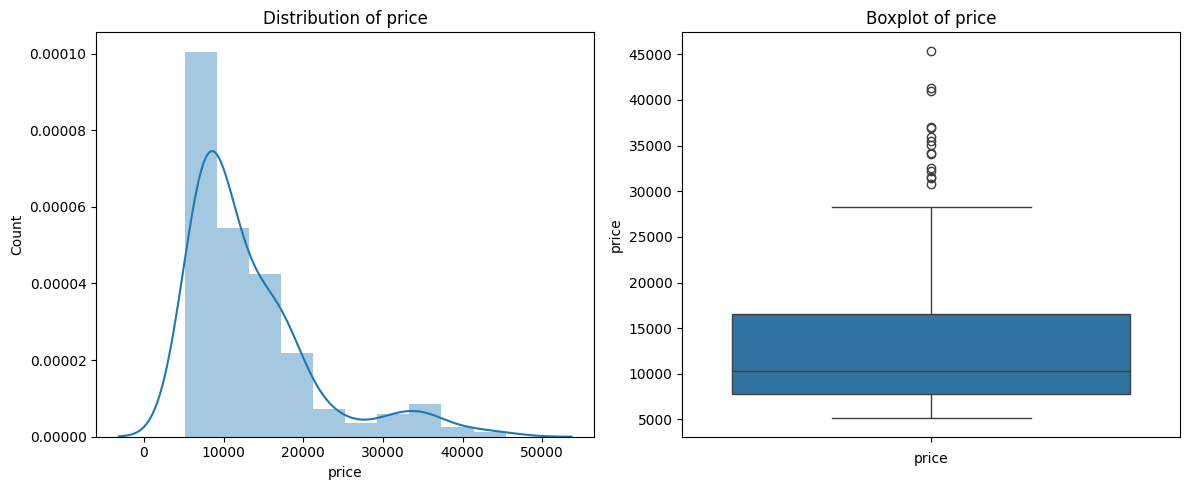

In [17]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "price" column
sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("price")
axes[0].set_ylabel("Count")

# Boxplot plot for the "price" column
sns.boxplot(data=df, y='price',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("price")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [18]:
#NORMALIZING THE TARGET VARIABLE
df['price']=np.log(df['price'])

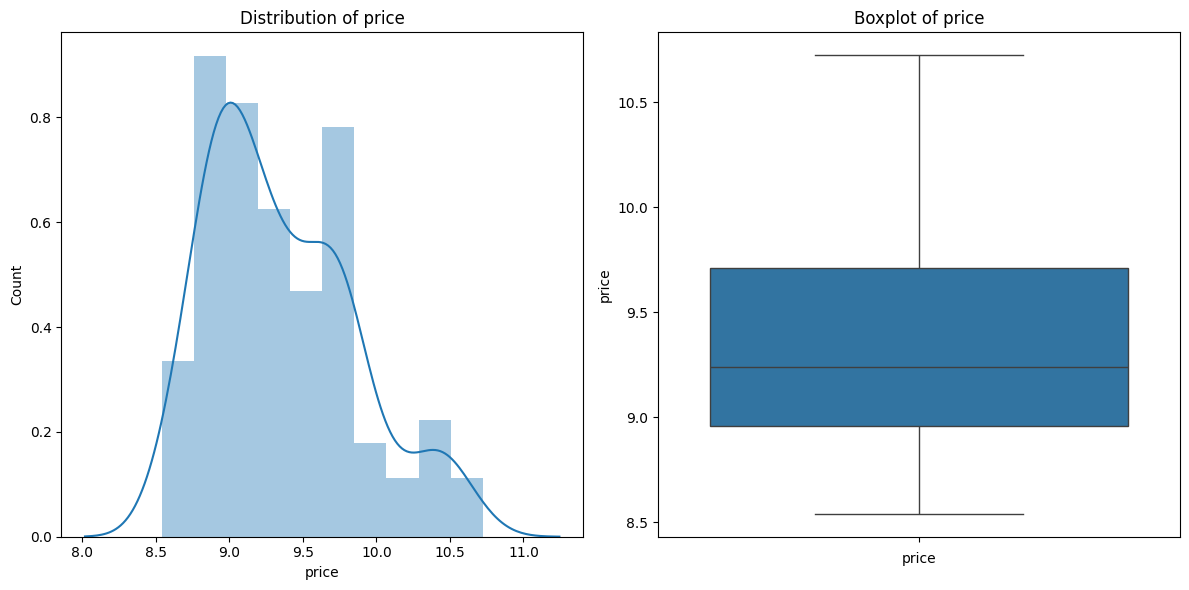

In [19]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Distribution plot for the "price" column
sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("price")
axes[0].set_ylabel("Count")

# Boxplot plot for the "price" column
sns.boxplot(data=df, y='price',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("price")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [20]:
plt.figure(figsize=(30, 20))

# Display the plot
plt.show()


<Figure size 3000x2000 with 0 Axes>

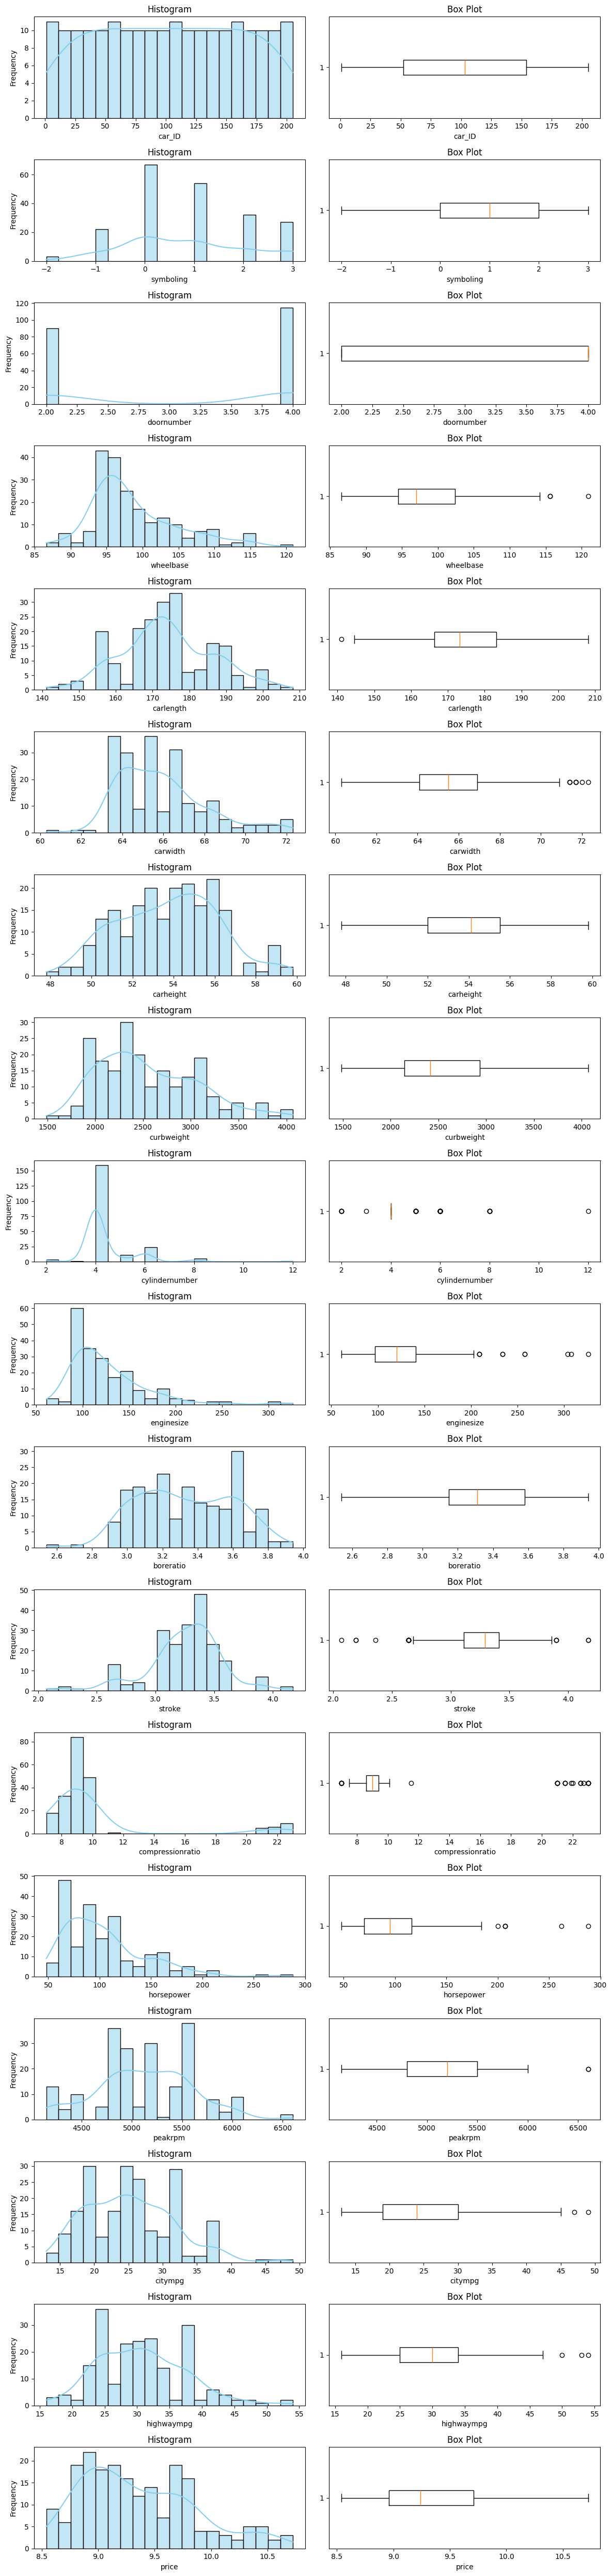

In [21]:

# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.5)

# Generate histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(data=df, x=column, bins=20, color='skyblue',kde=True, ax=axes[i,0])
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    # Box plot
    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

In [22]:
car=[]
for column in df.columns:
    if df[column].dtype== object:
        car.append(column)

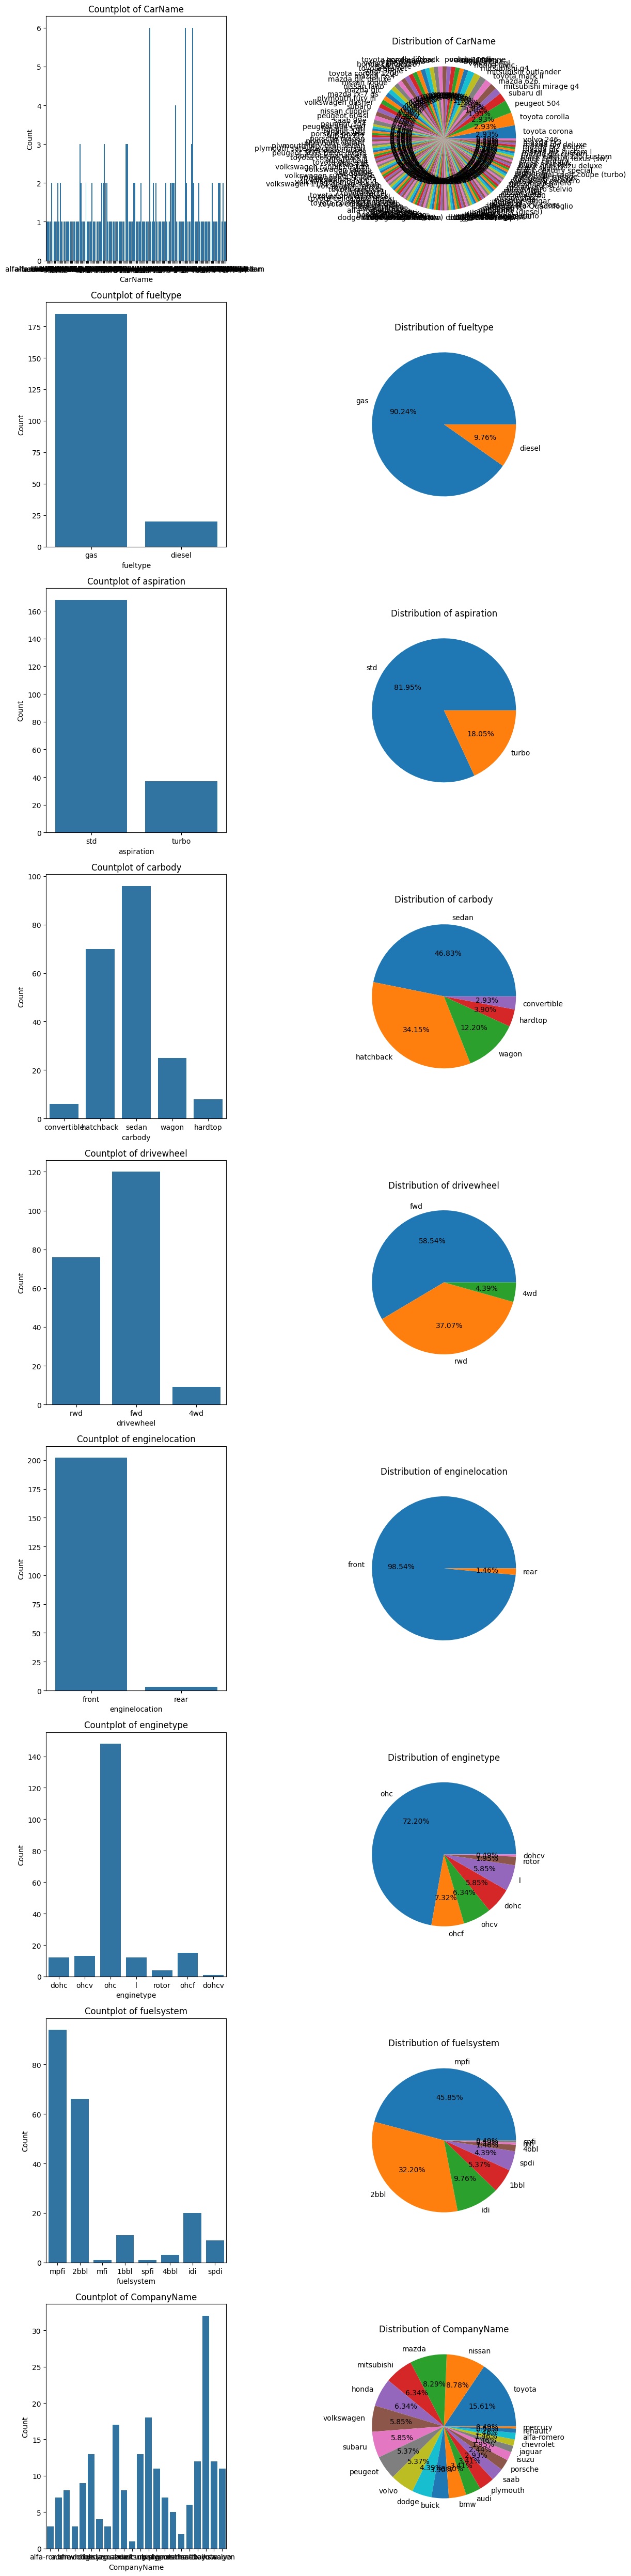

In [23]:

# Assuming 'car' is a list of categorical column names
fig, axes = plt.subplots(nrows=len(car), ncols=2, figsize=(12, 50))

for i, column in enumerate(car):
    
    # Plot the count plot (histogram) in the first column of the current row
        sns.countplot(x=column, data=df, ax=axes[i, 0])
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Count')
        axes[i, 0].set_title('Countplot of ' + column)

    # Plot the pie chart in the second column of the current row using Pandas plot
        df[column].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[i, 1])
        axes[i, 1].set_title('Distribution of ' + column)
        axes[i, 1].set_ylabel('')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the subplots
plt.show()

In [24]:
numerical_columns = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

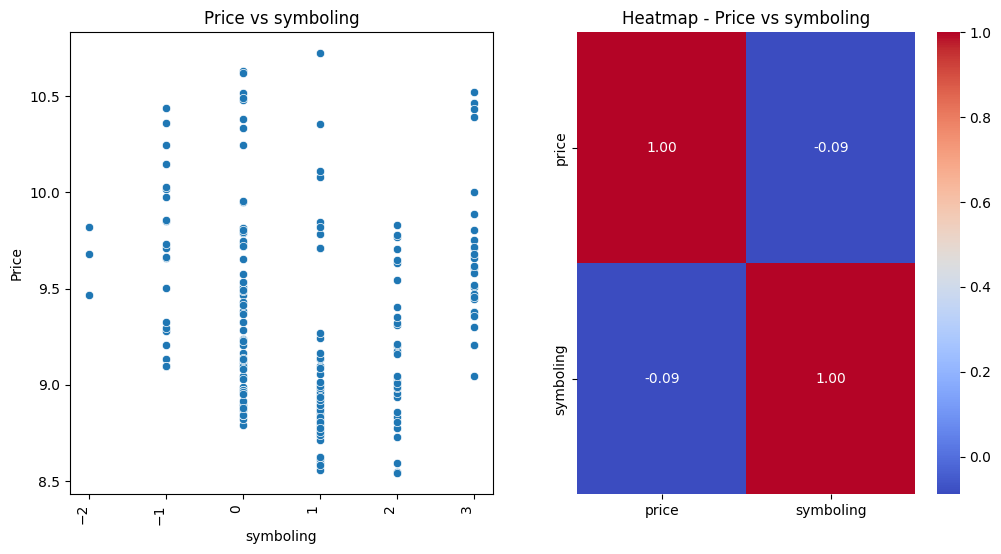

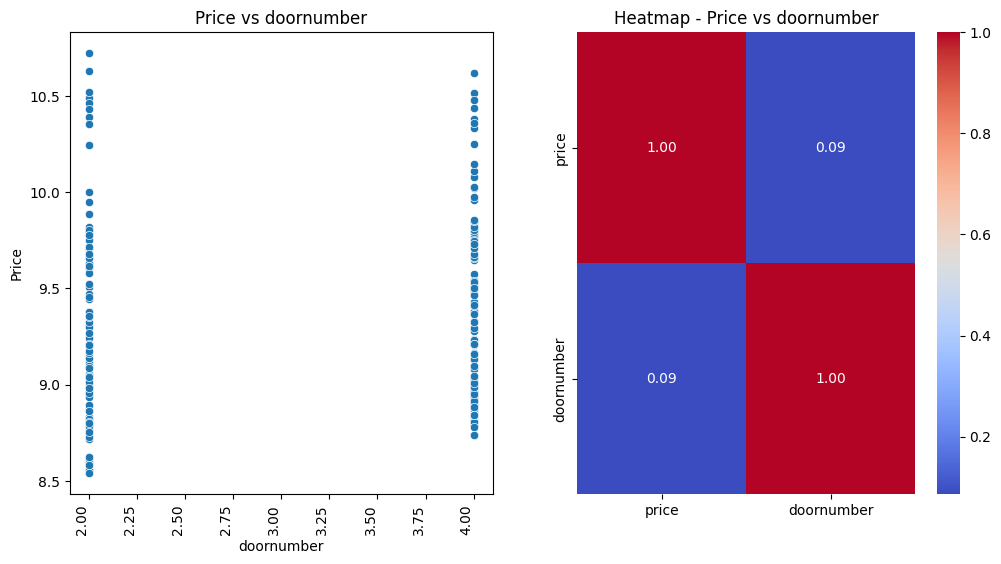

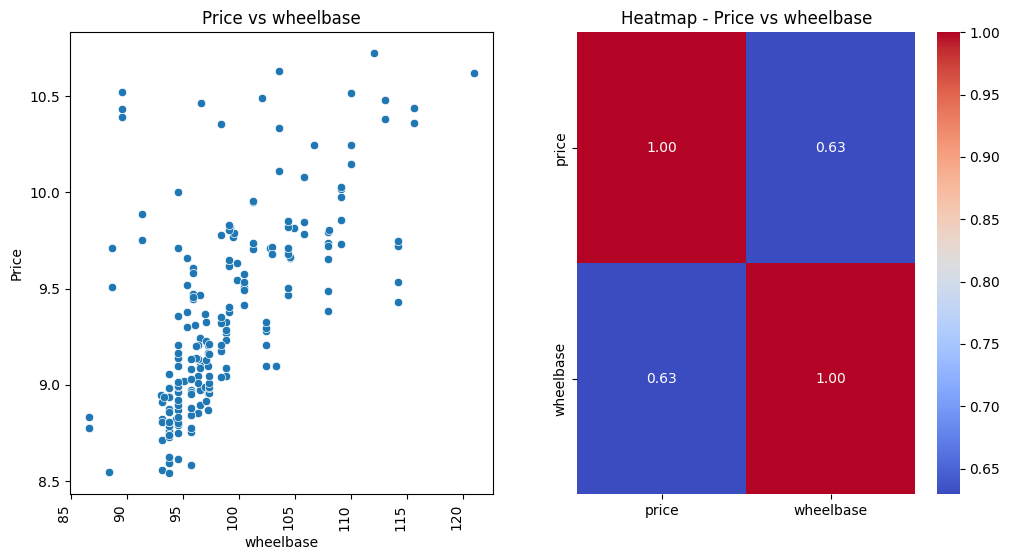

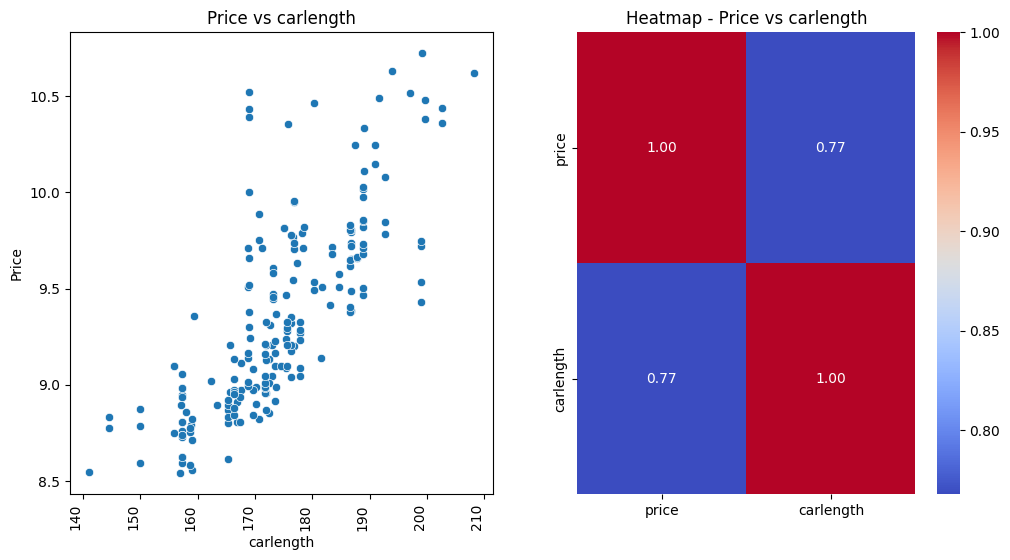

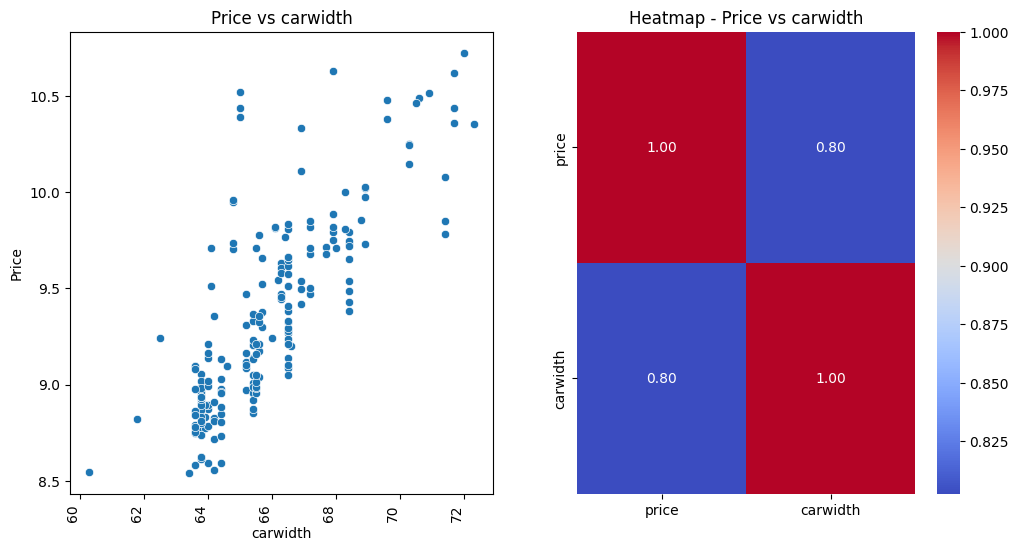

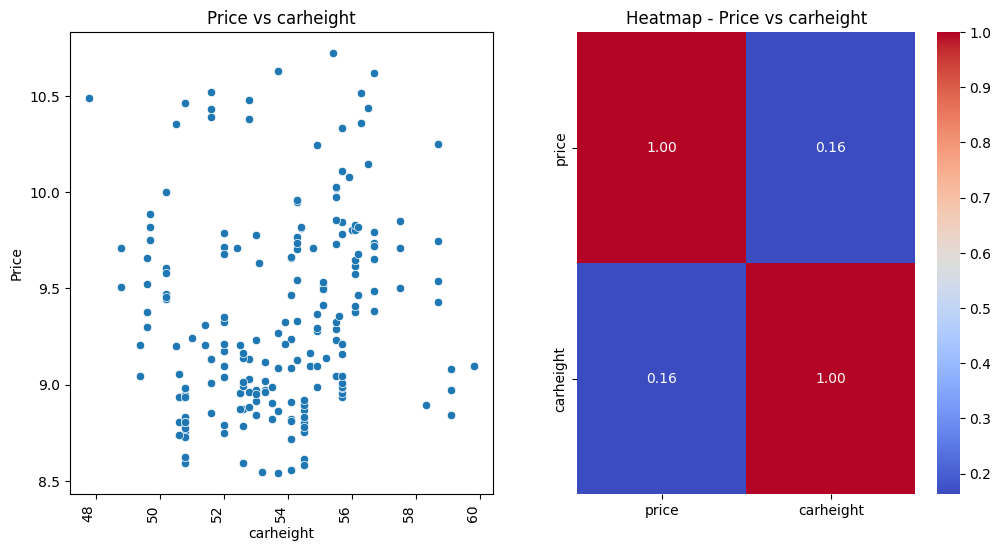

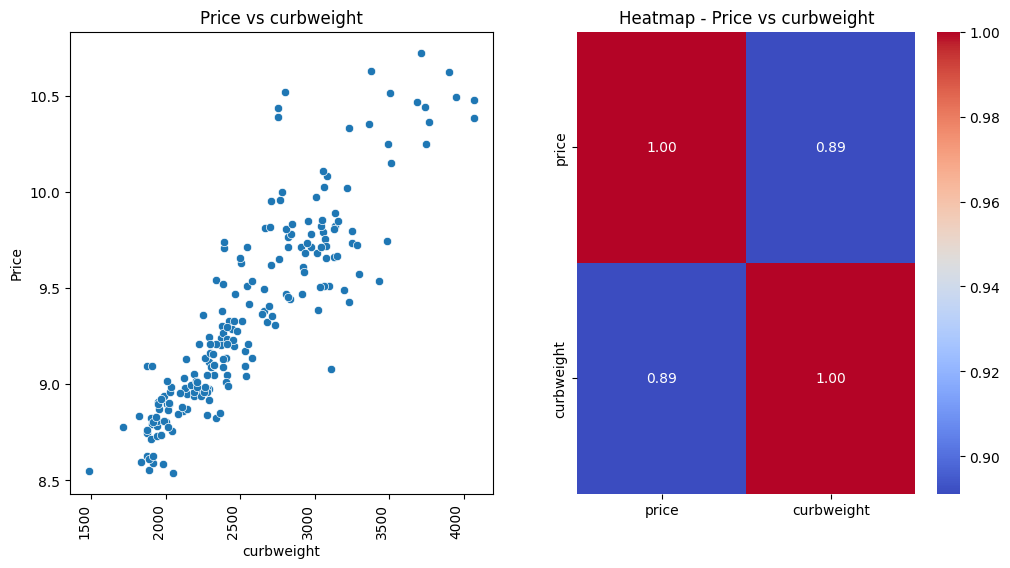

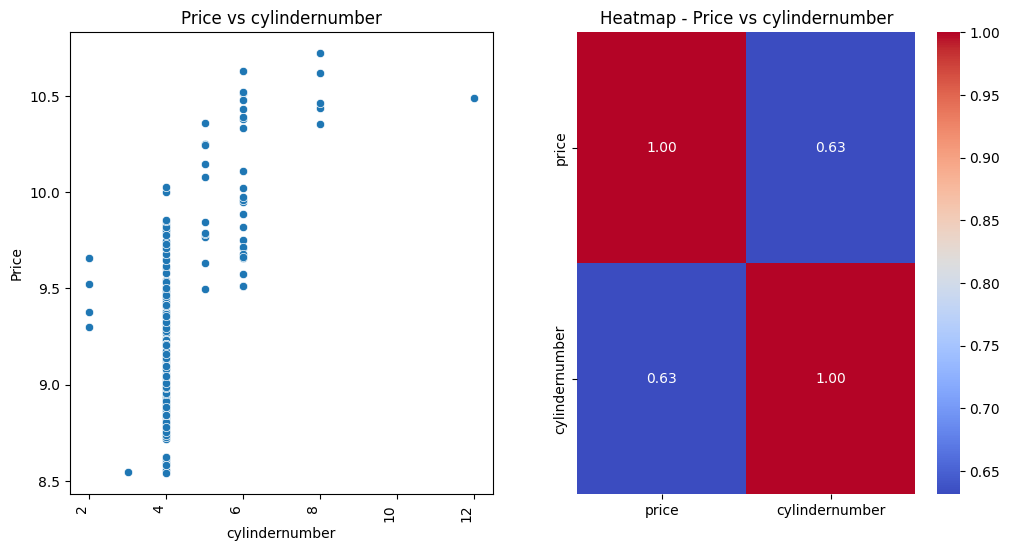

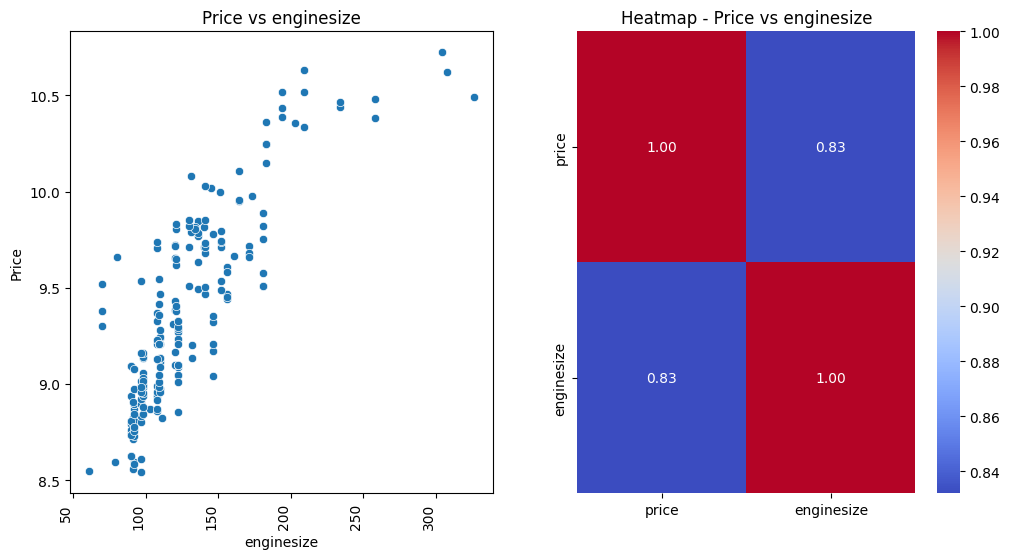

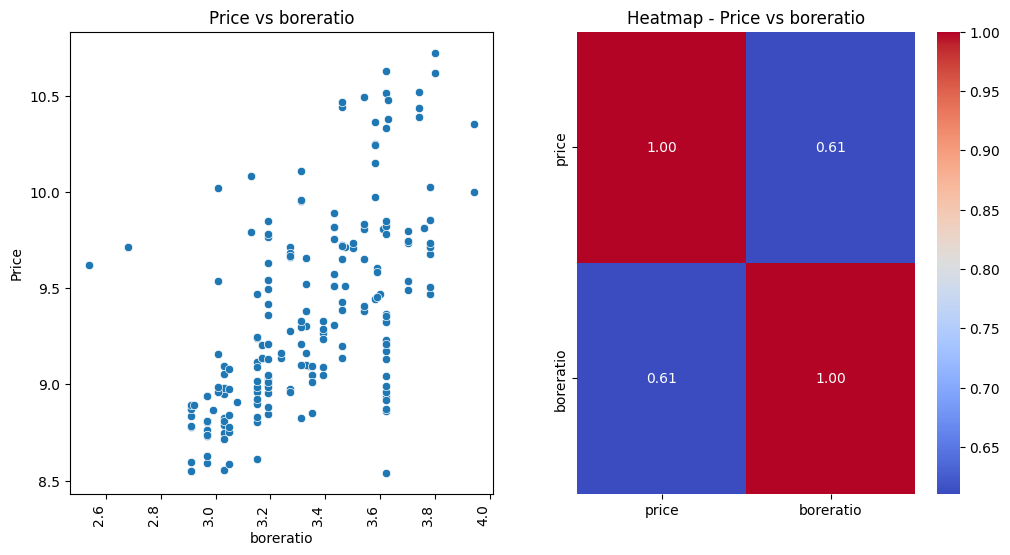

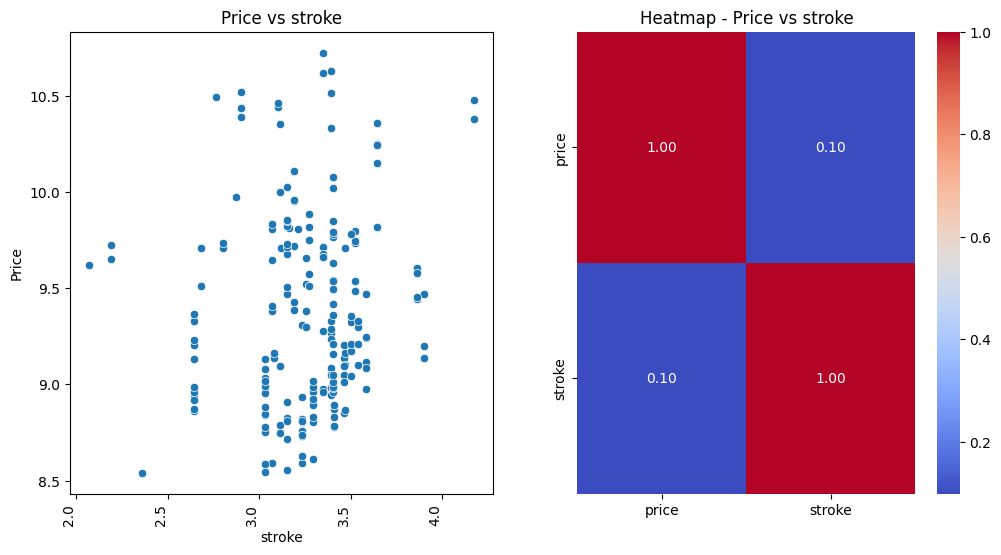

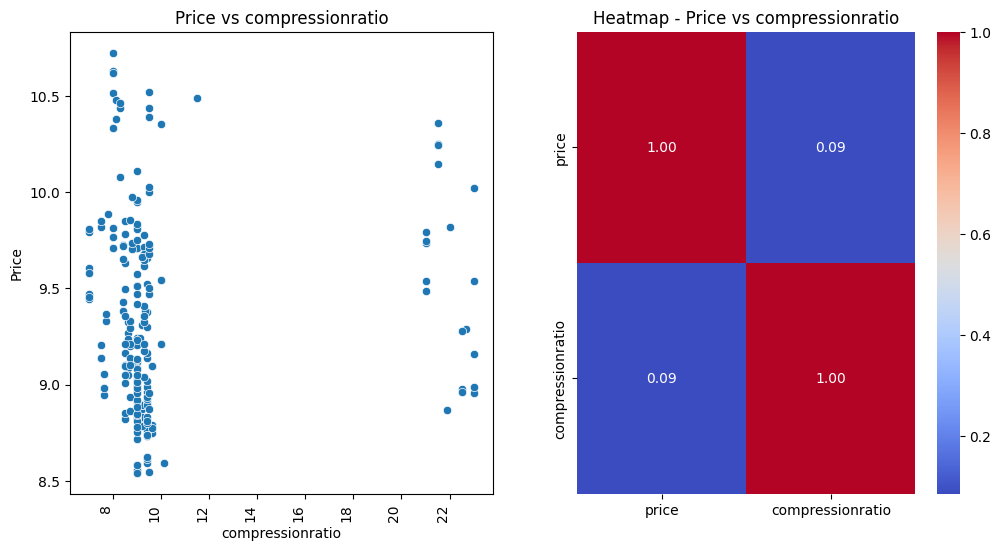

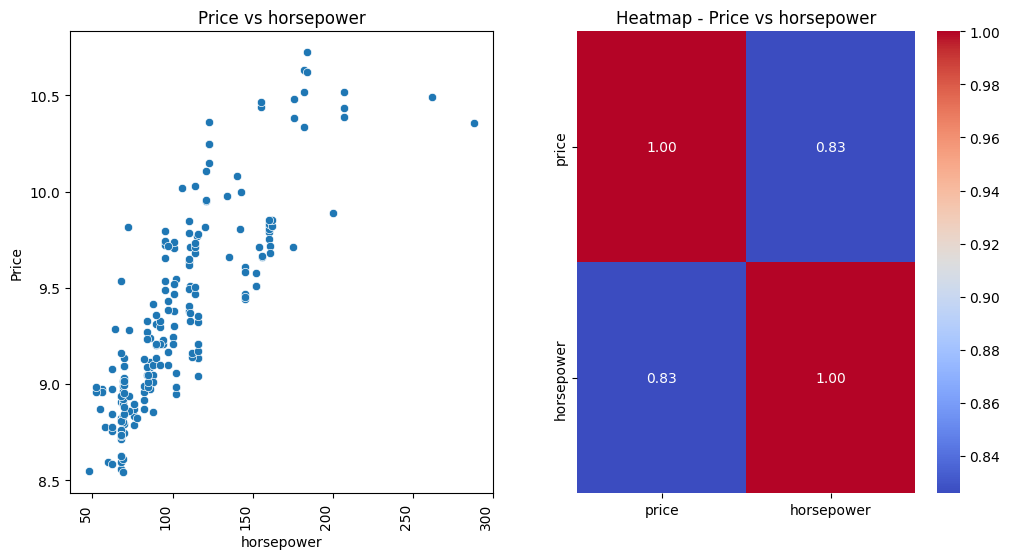

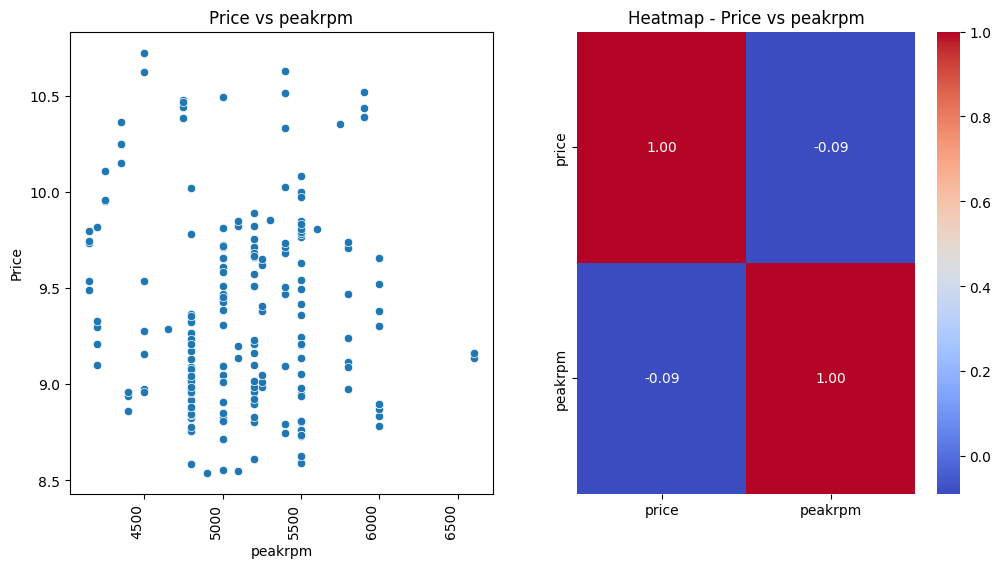

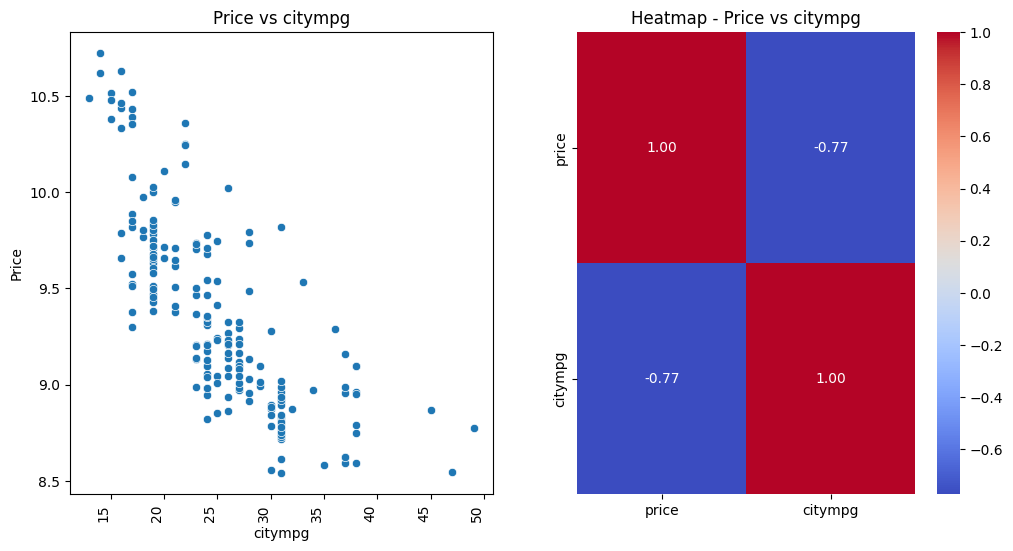

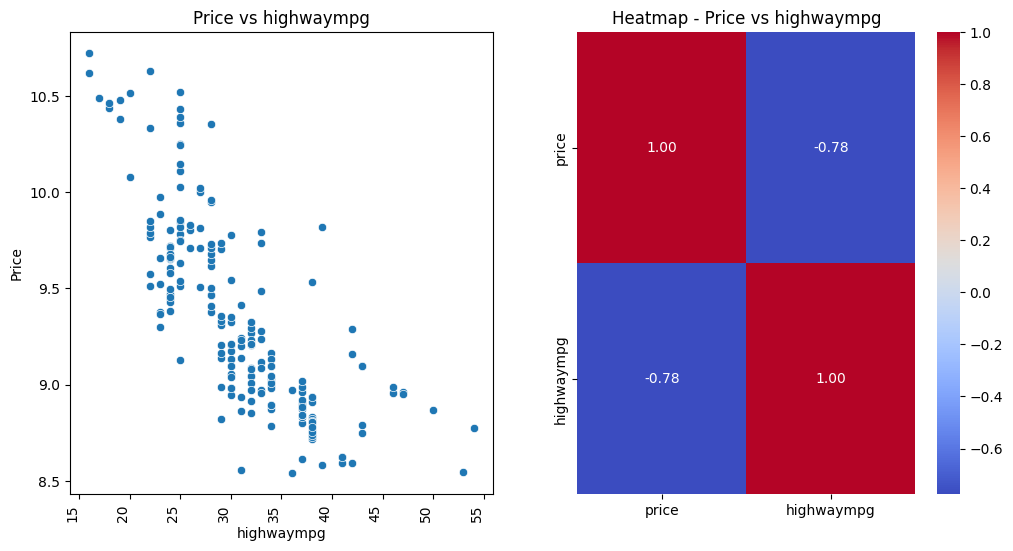

In [25]:
for column in numerical_columns:
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot using seaborn
    sns.scatterplot(x=df[column], y=df['price'], ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Price')
    axes[0].set_title('Price vs ' + column)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

    # Heatmap using seaborn
    sns.heatmap(df[['price', column]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])

    # Set plot title
    plt.title("Heatmap - Price vs " + column)

    # Display the plot
    plt.show()

In [26]:
from scipy.stats import pearsonr

numerical_columns = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Assuming 'df' is your DataFrame containing the data

for column in numerical_columns:
    correlation, p_value = pearsonr(df['price'], df[column])
    print("Correlation with 'price' for column '{}' : {:.4f}".format(column, correlation))
    print("p-value for column '{}' : {:.4f}".format(column, p_value))
    print("------------------------------------------------------")

Correlation with 'price' for column 'symboling' : -0.0887
p-value for column 'symboling' : 0.2059
------------------------------------------------------
Correlation with 'price' for column 'doornumber' : 0.0866
p-value for column 'doornumber' : 0.2169
------------------------------------------------------
Correlation with 'price' for column 'wheelbase' : 0.6294
p-value for column 'wheelbase' : 0.0000
------------------------------------------------------
Correlation with 'price' for column 'carlength' : 0.7679
p-value for column 'carlength' : 0.0000
------------------------------------------------------
Correlation with 'price' for column 'carwidth' : 0.8025
p-value for column 'carwidth' : 0.0000
------------------------------------------------------
Correlation with 'price' for column 'carheight' : 0.1628
p-value for column 'carheight' : 0.0197
------------------------------------------------------
Correlation with 'price' for column 'curbweight' : 0.8912
p-value for column 'curbweigh

In [27]:
categorical_column=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','CompanyName']

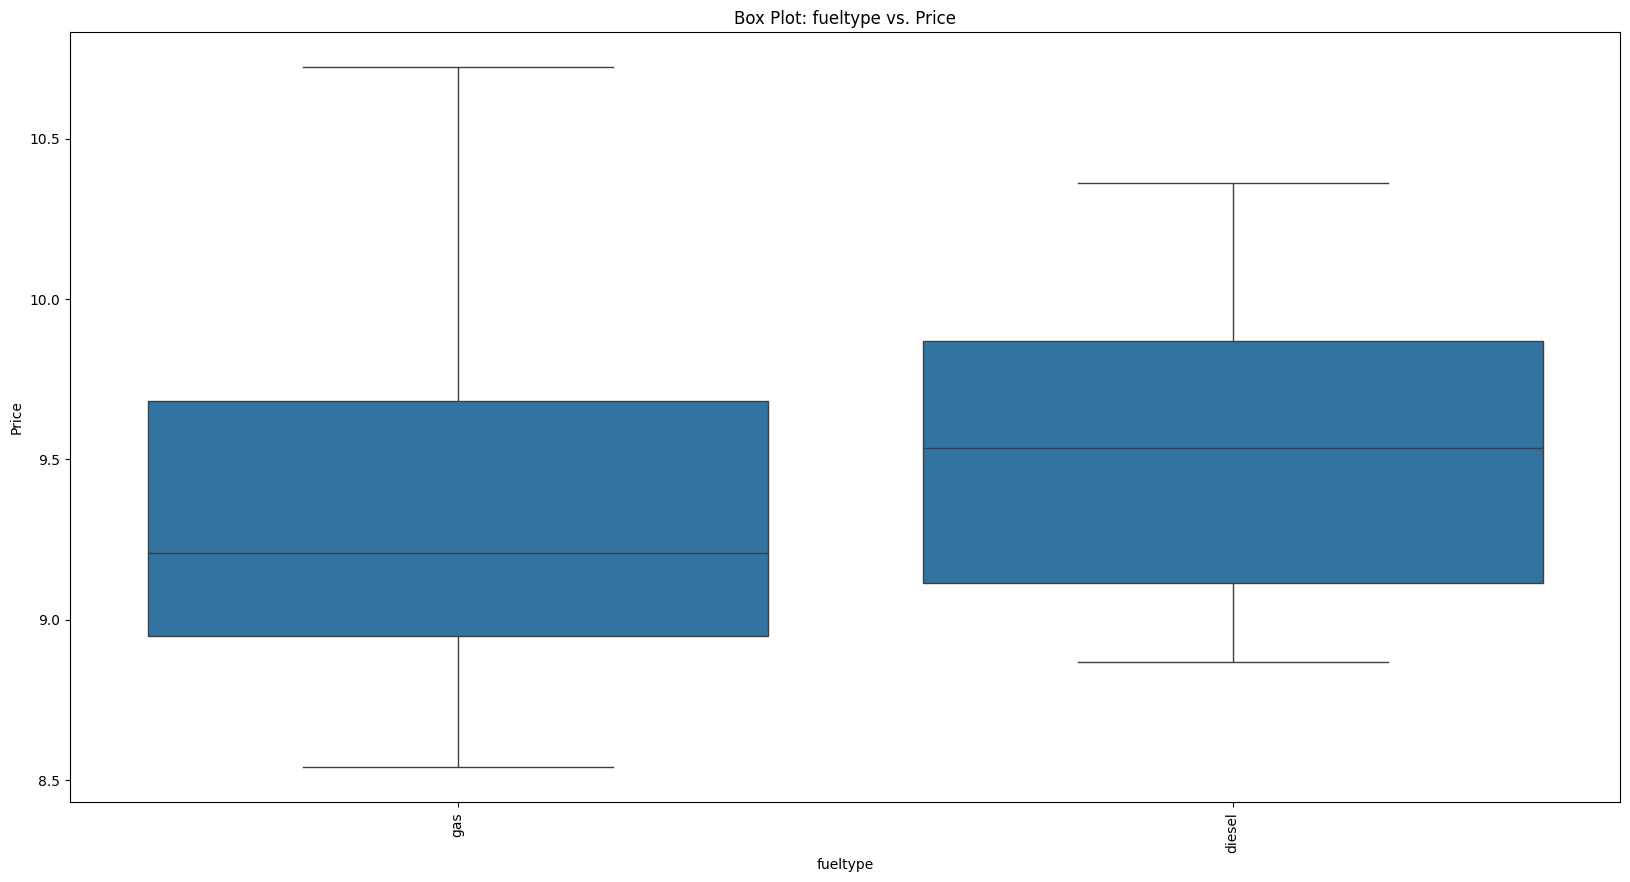

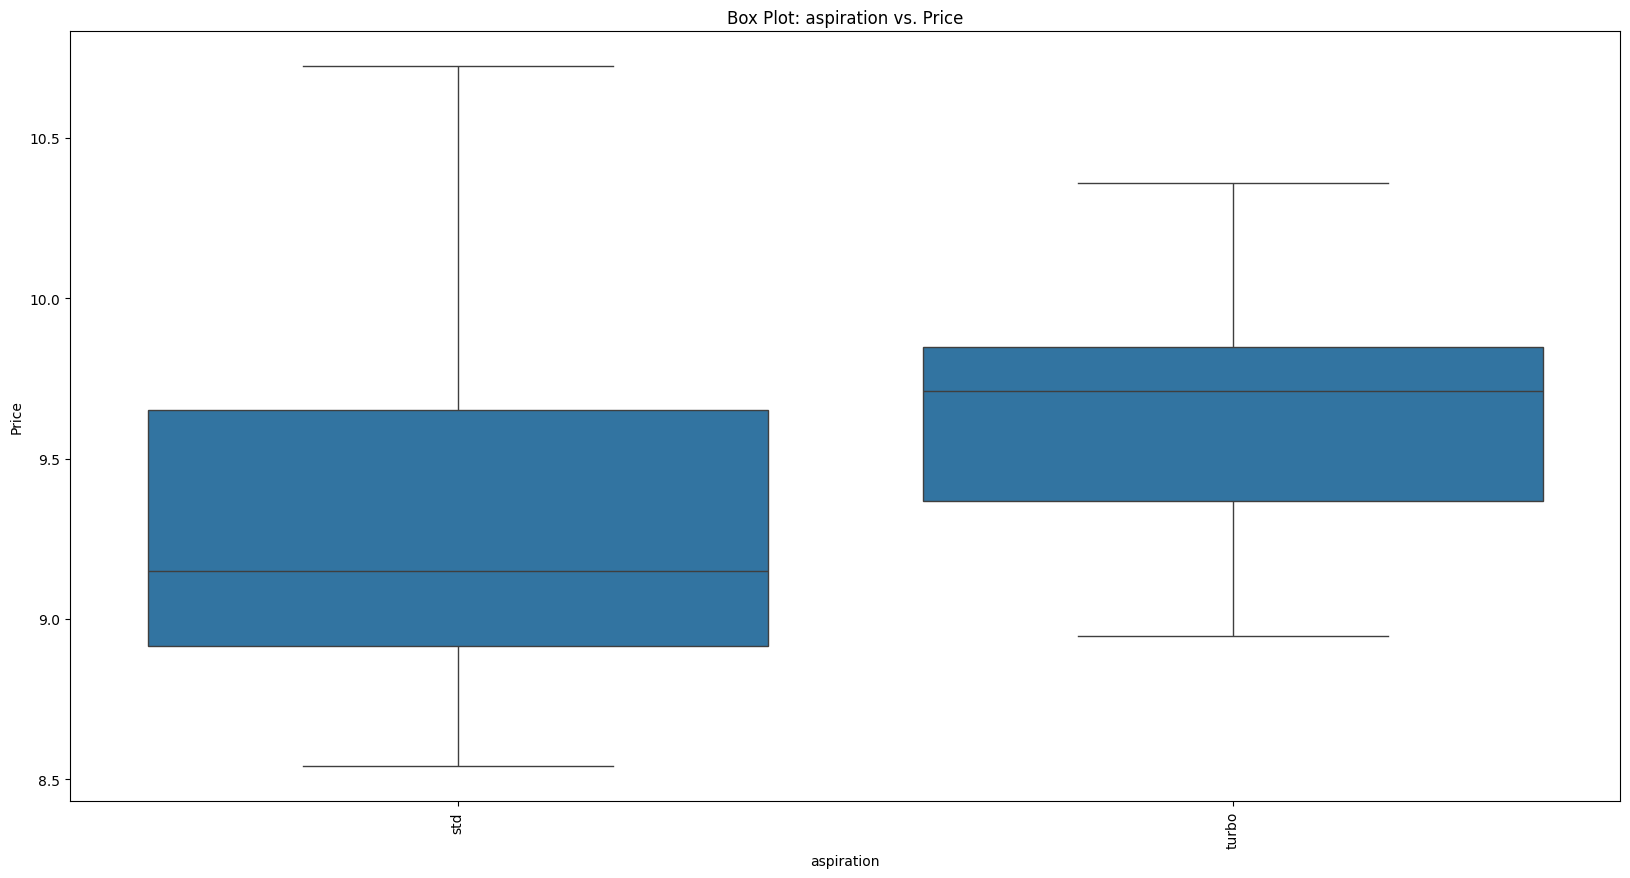

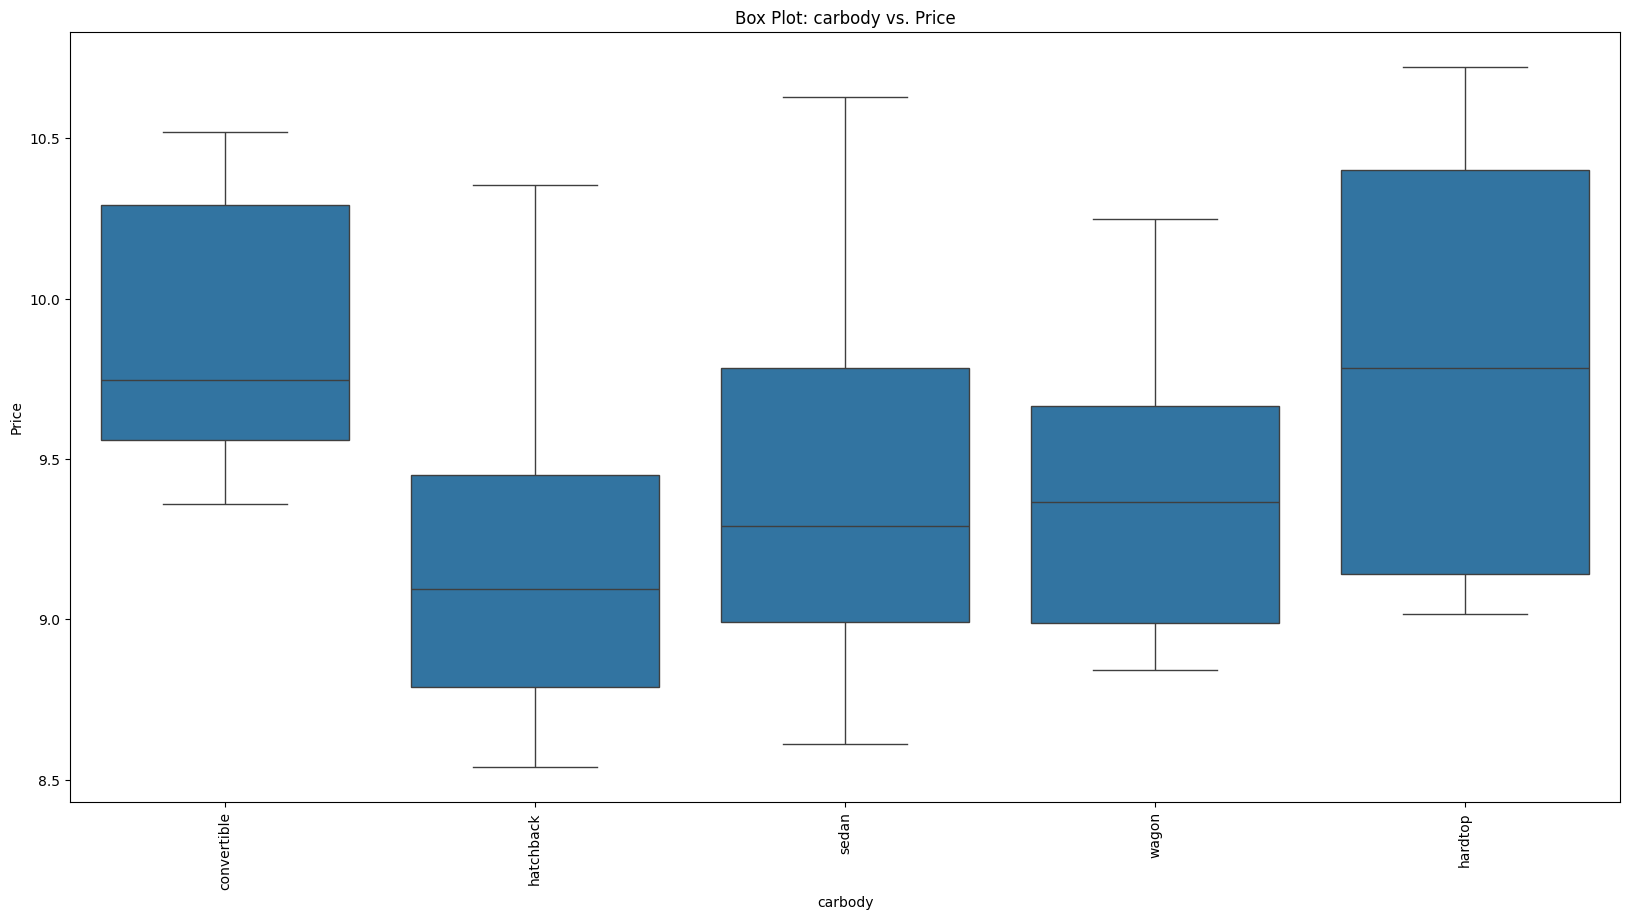

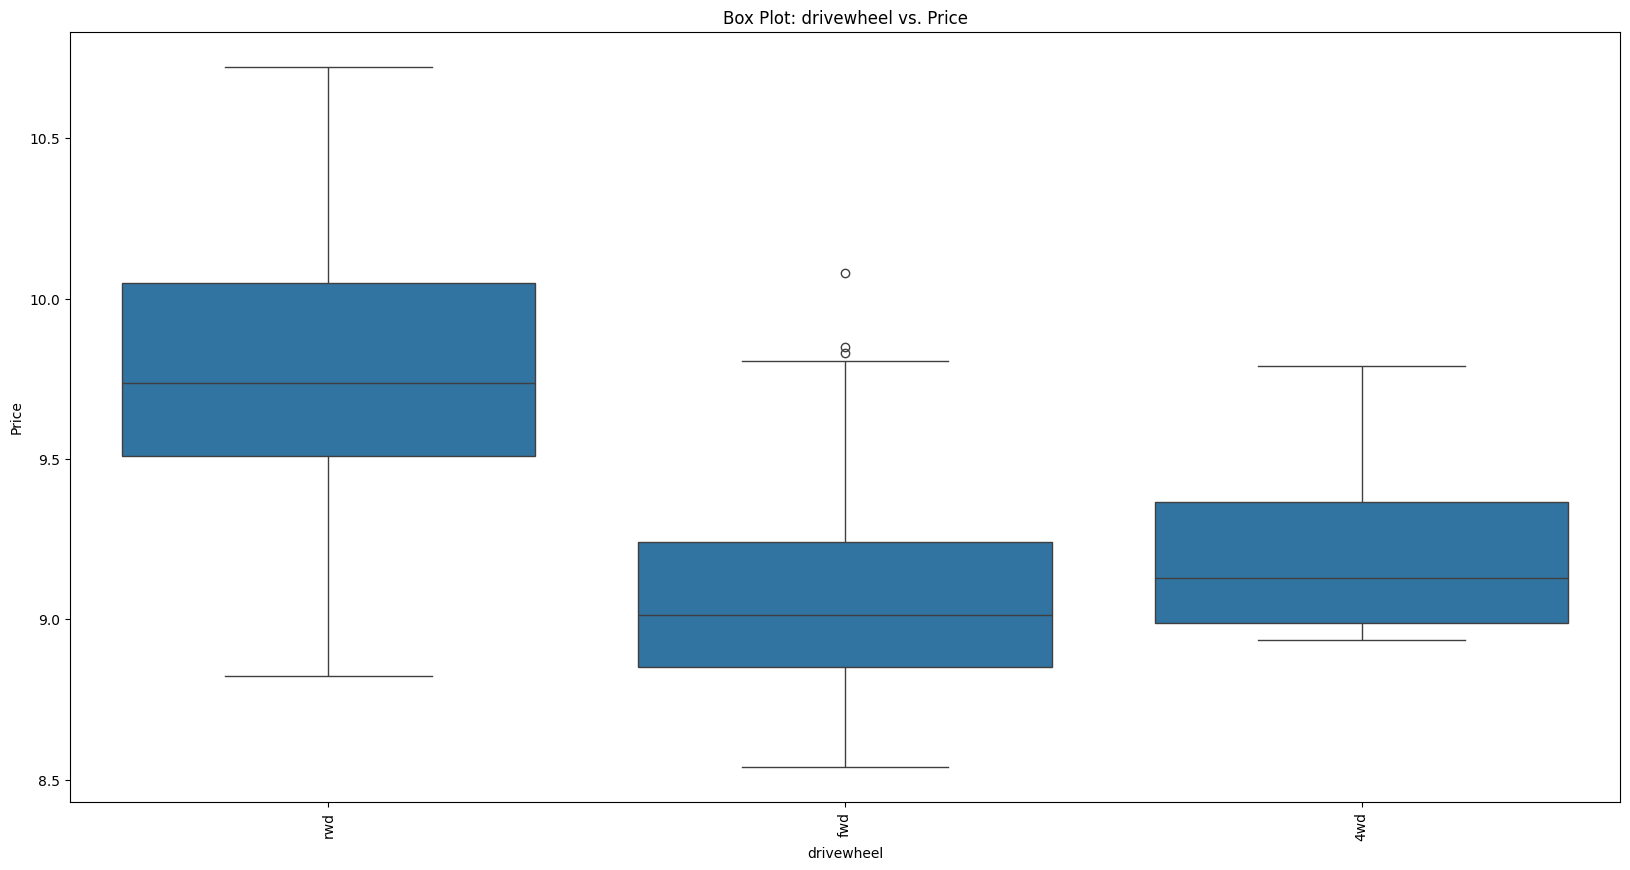

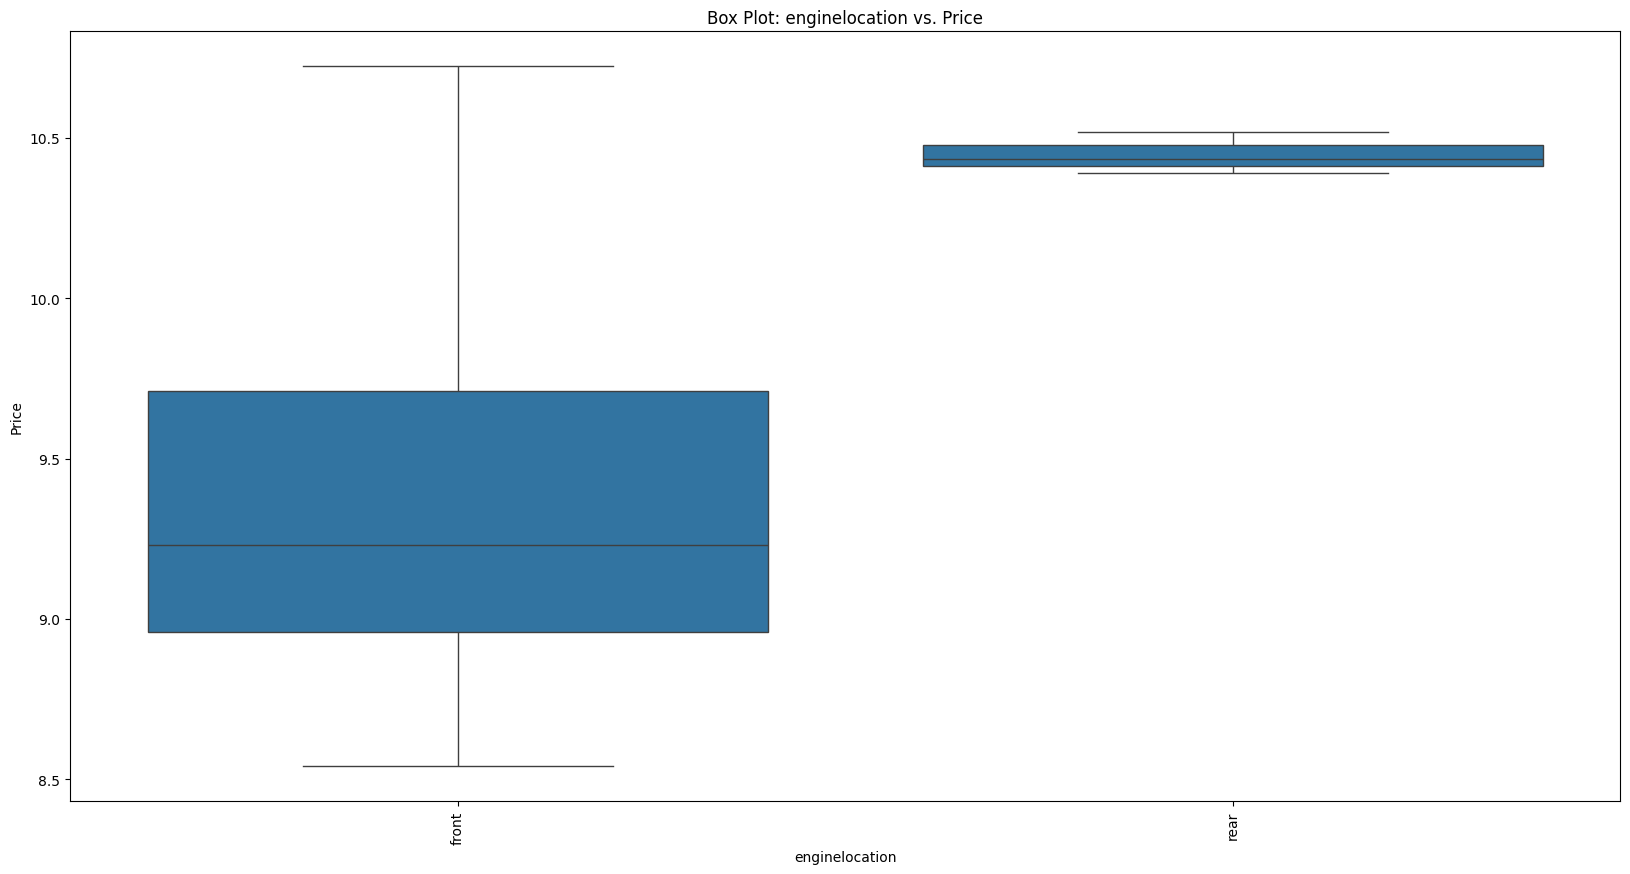

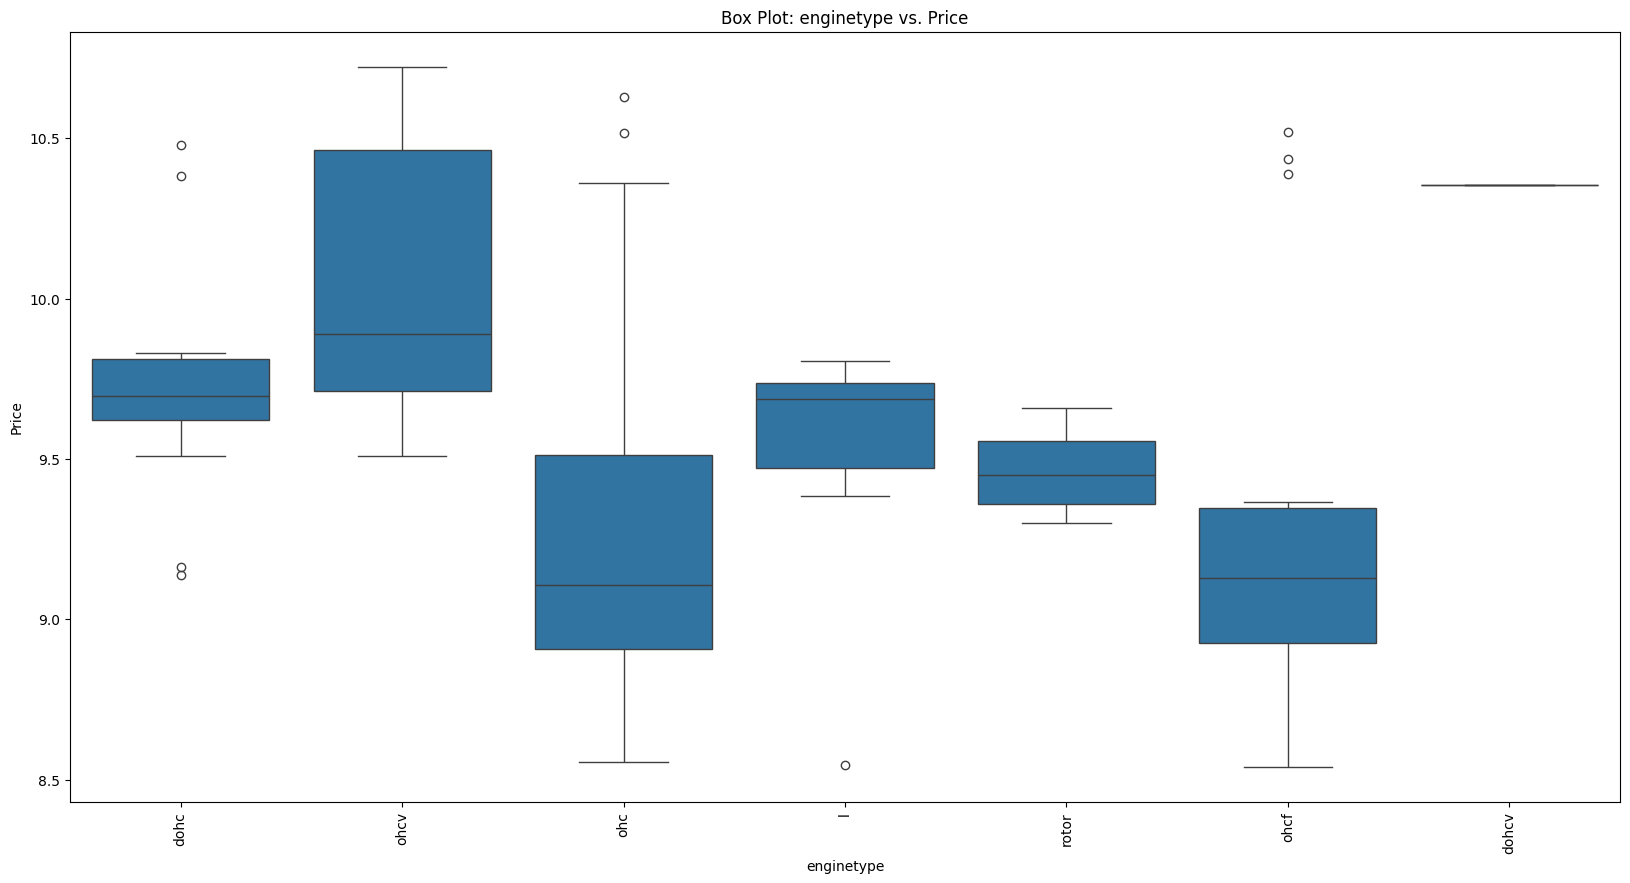

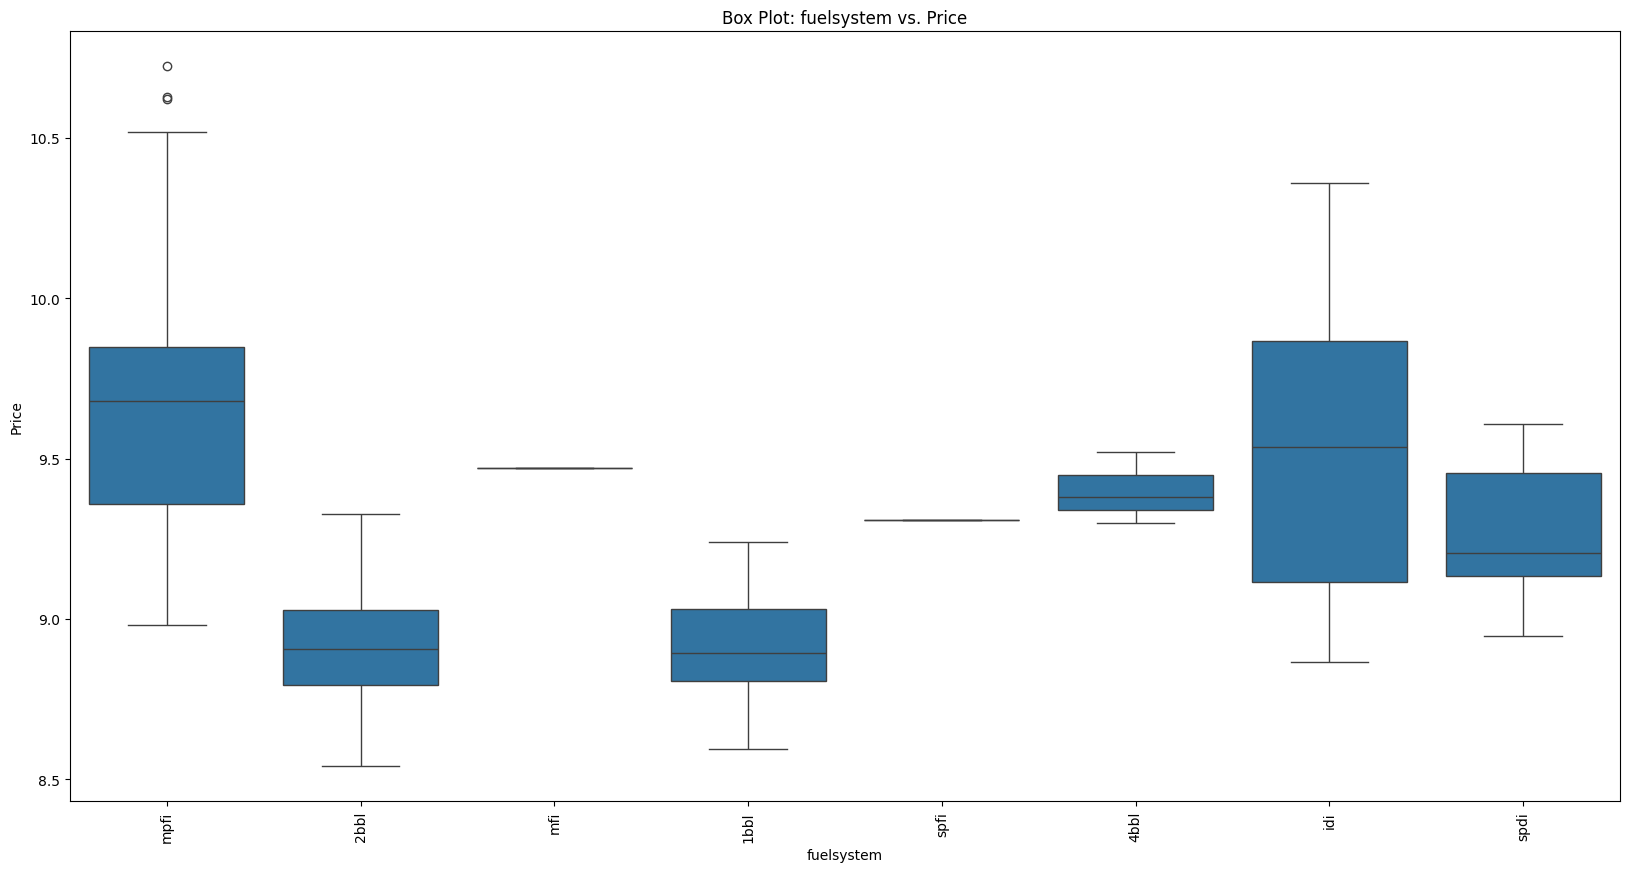

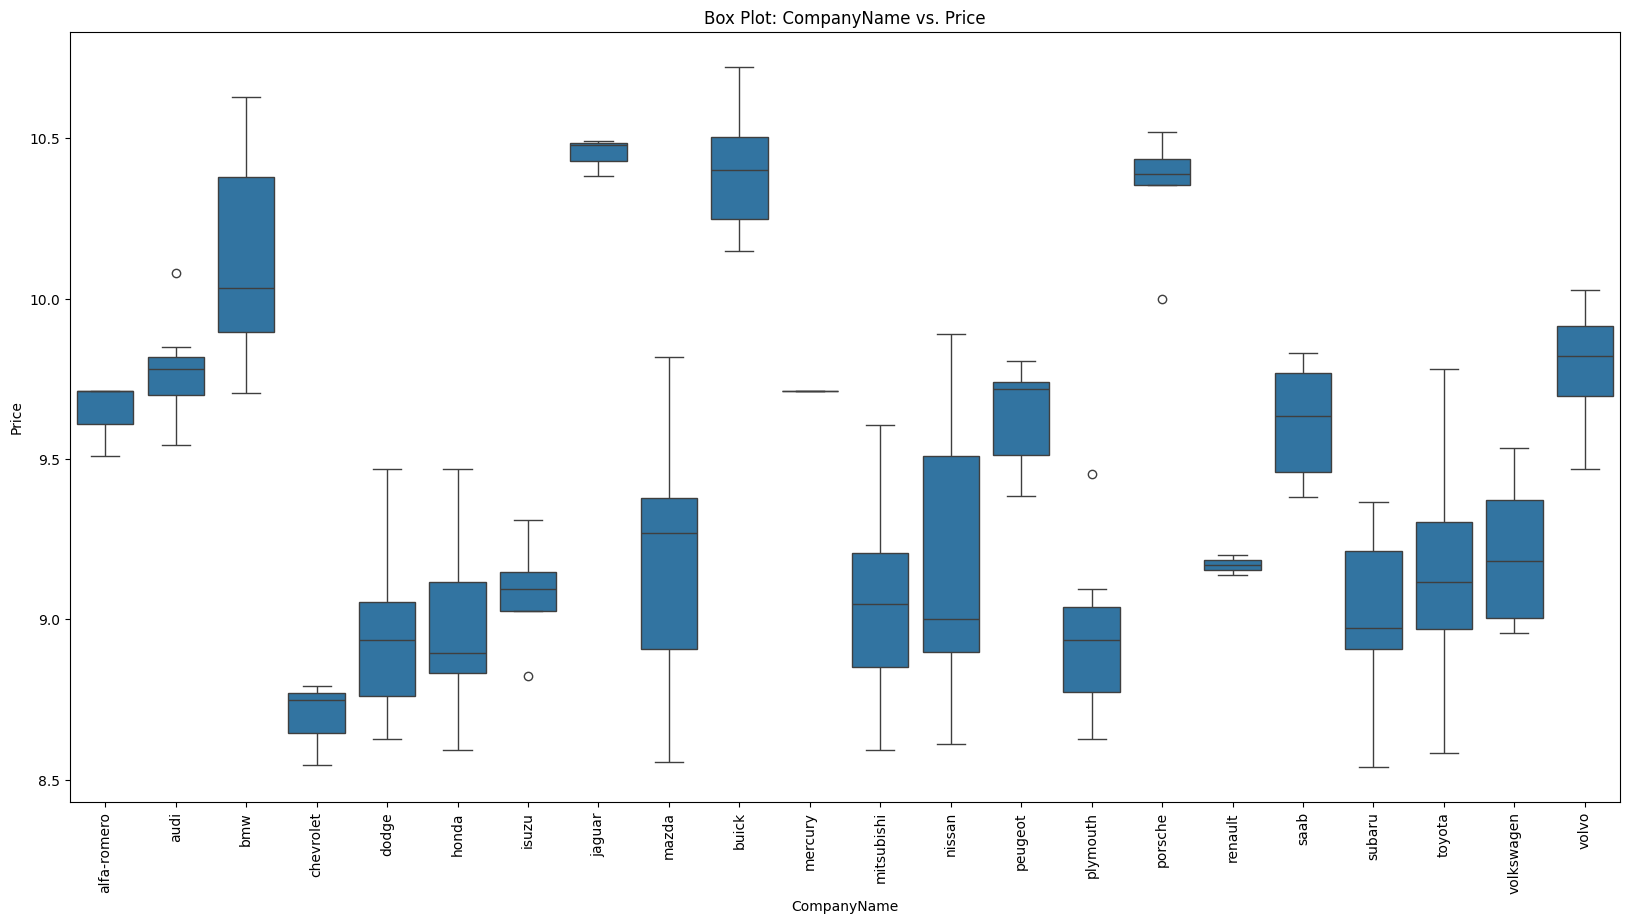

In [28]:
# Loop through each categorical column
for column in categorical_column:
    plt.figure(figsize=(20, 10))
    
    # Create a box plot
    sns.boxplot(data=df, x=column, y='price')
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Box Plot: {column} vs. Price')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

In [29]:
car_columns=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

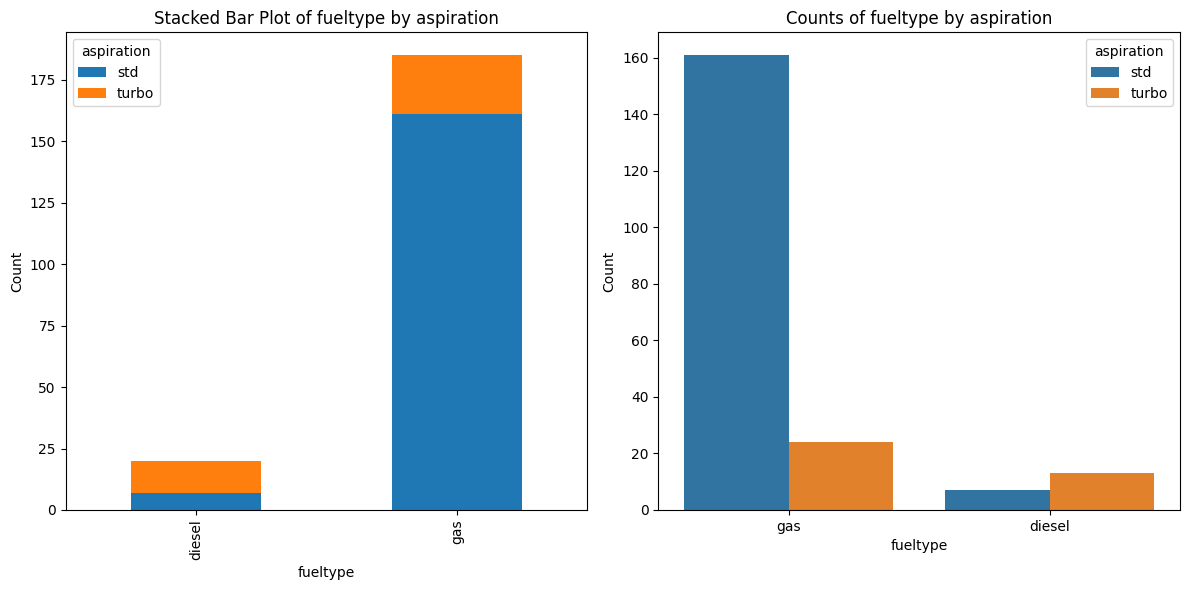

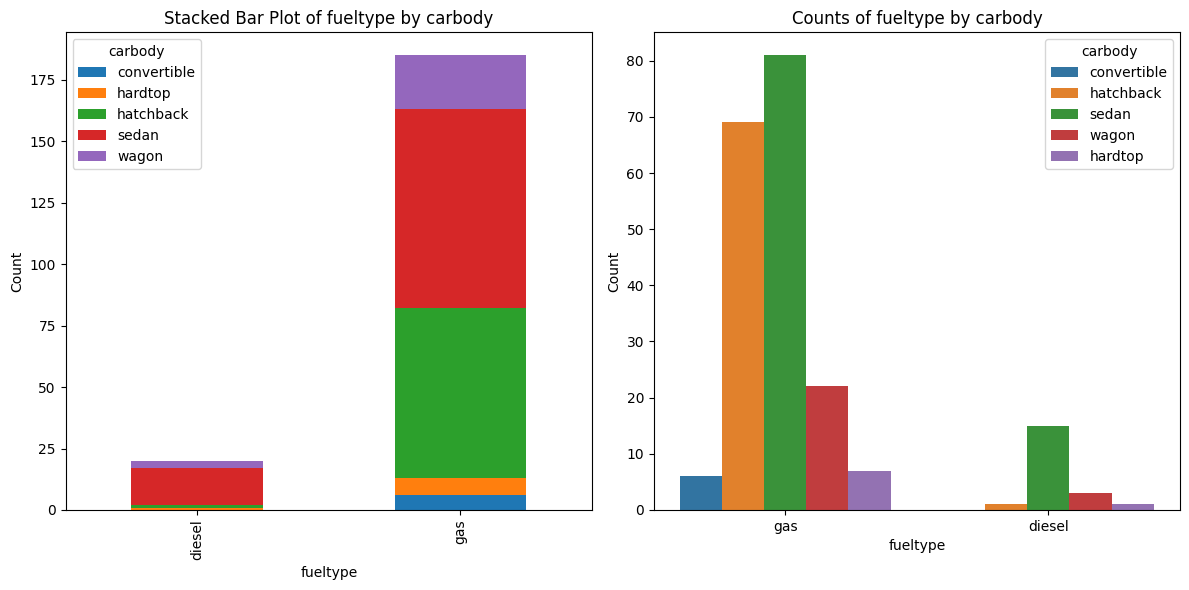

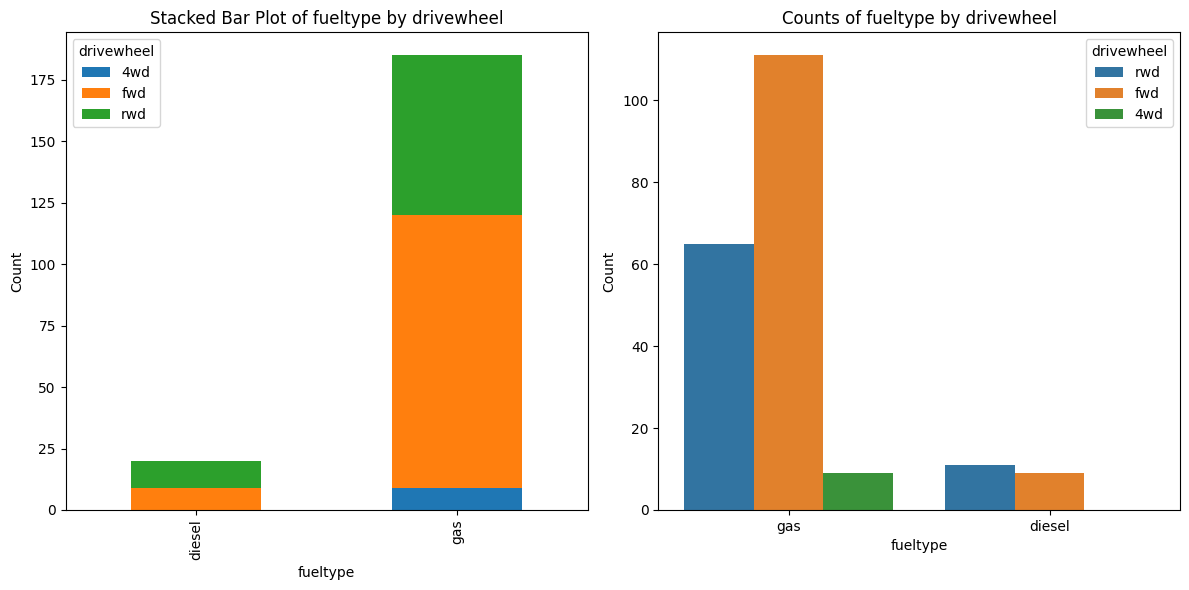

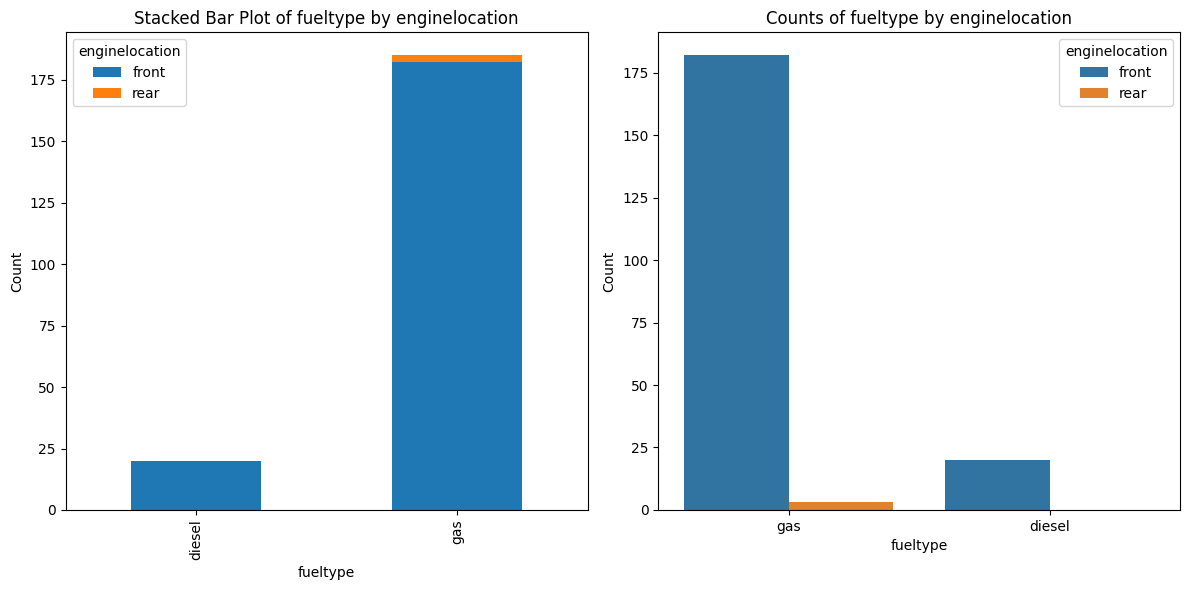

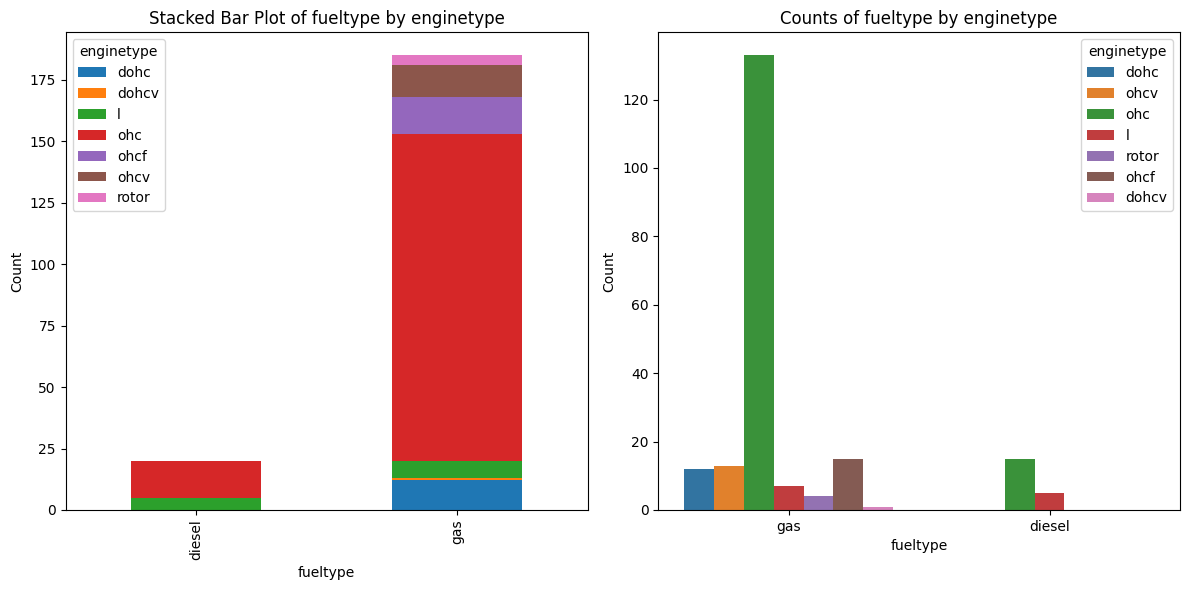

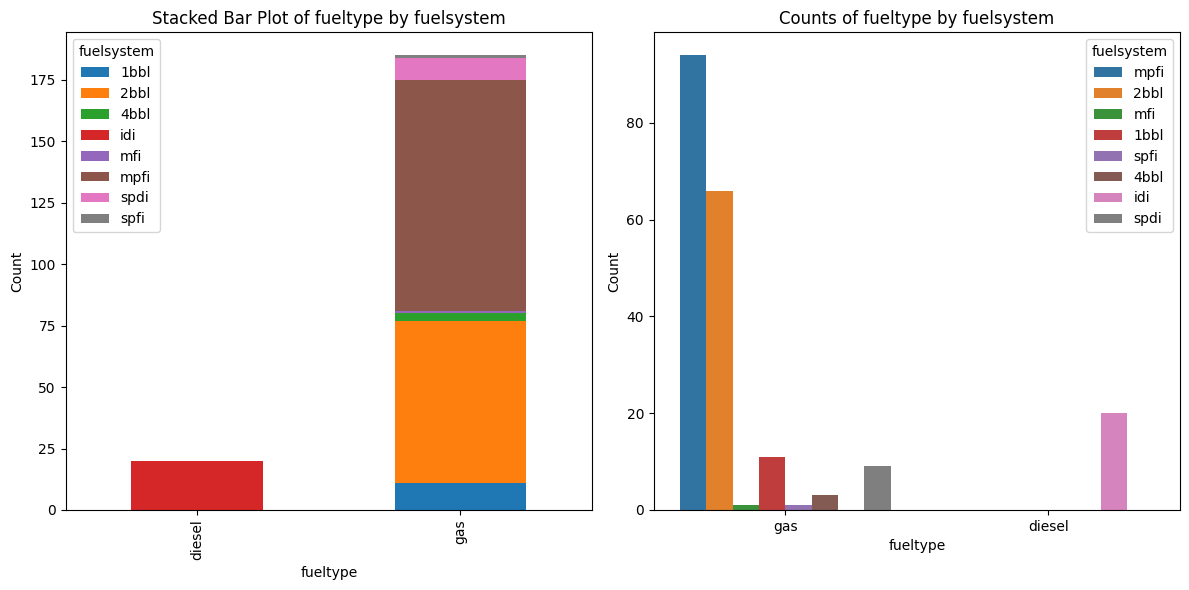

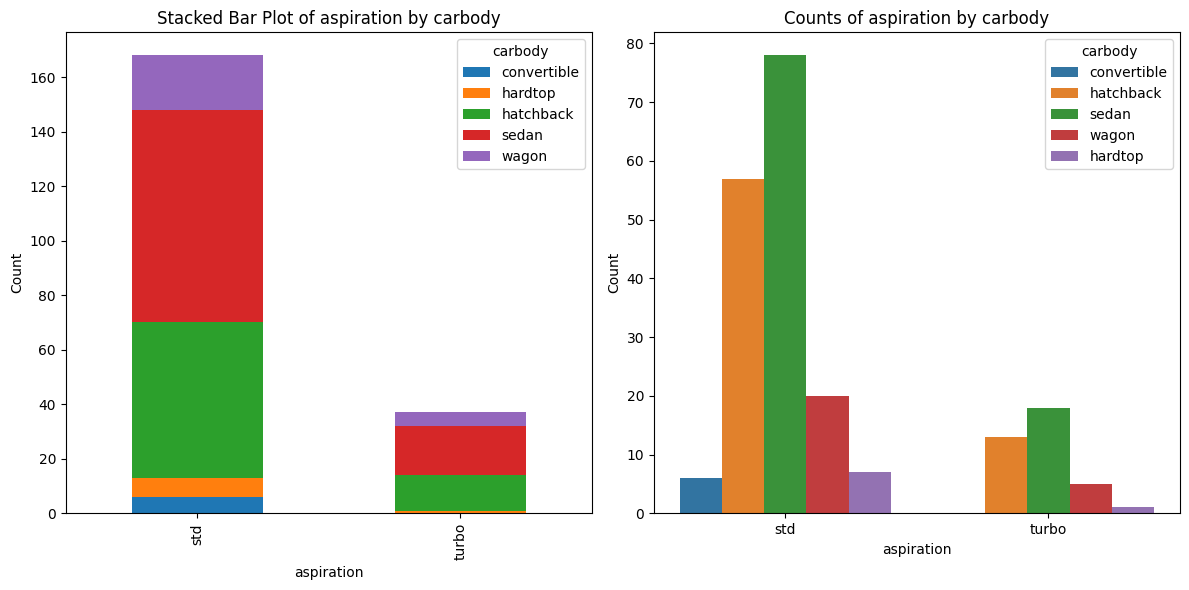

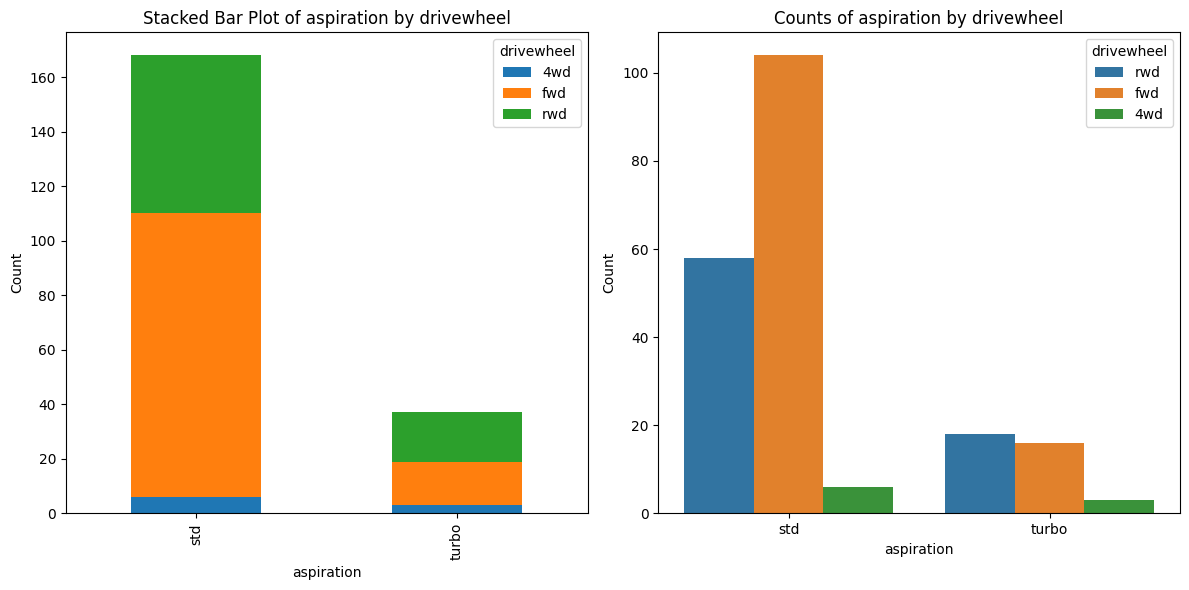

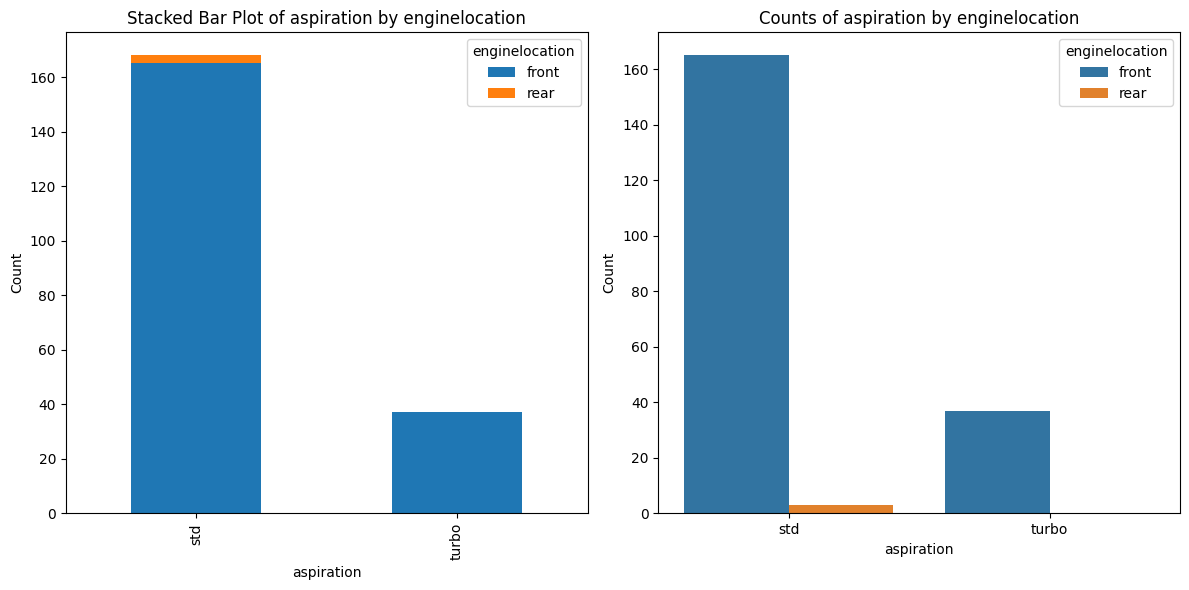

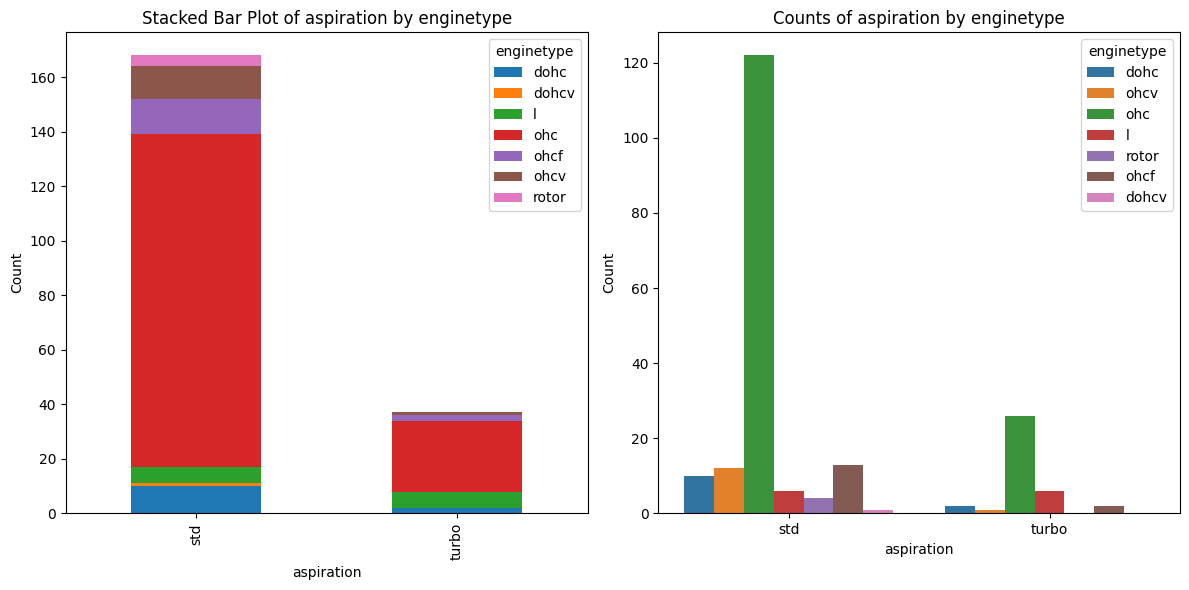

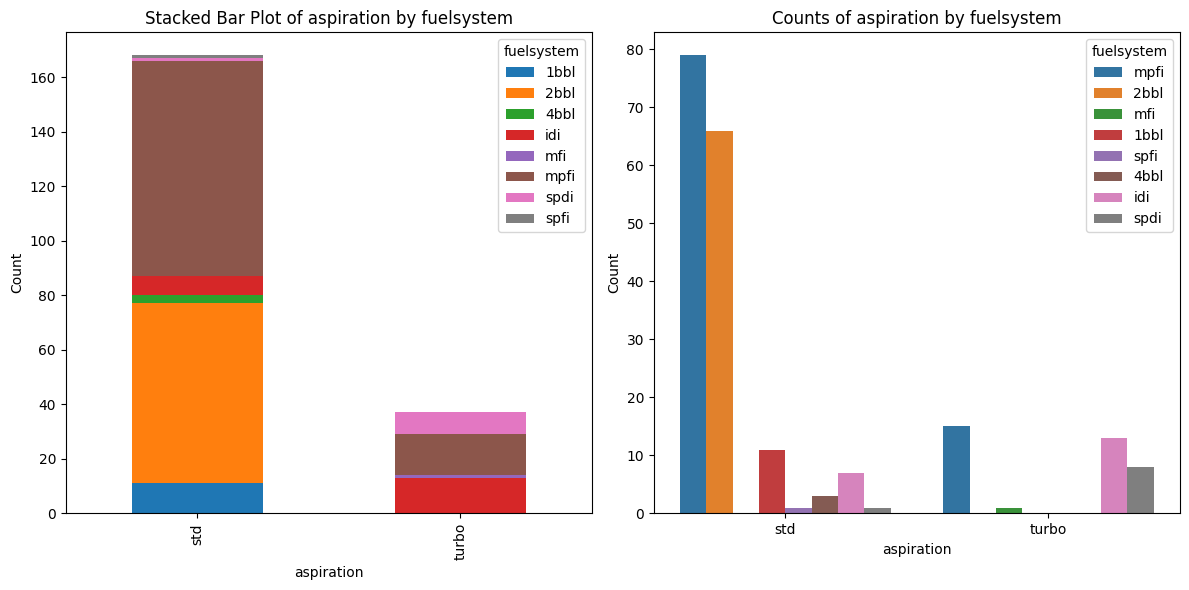

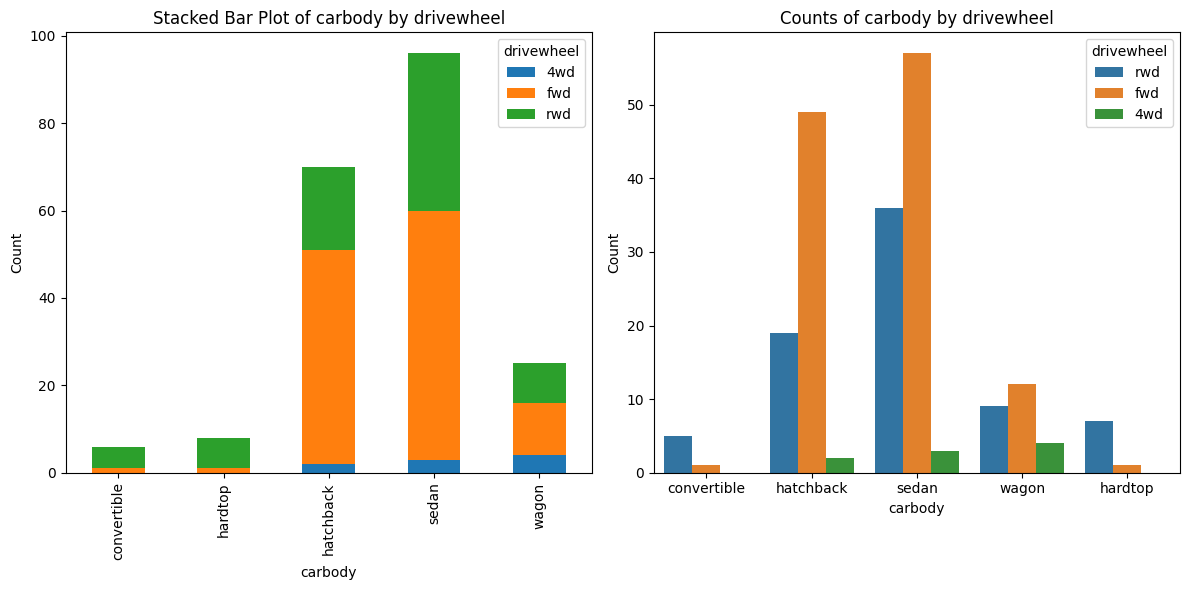

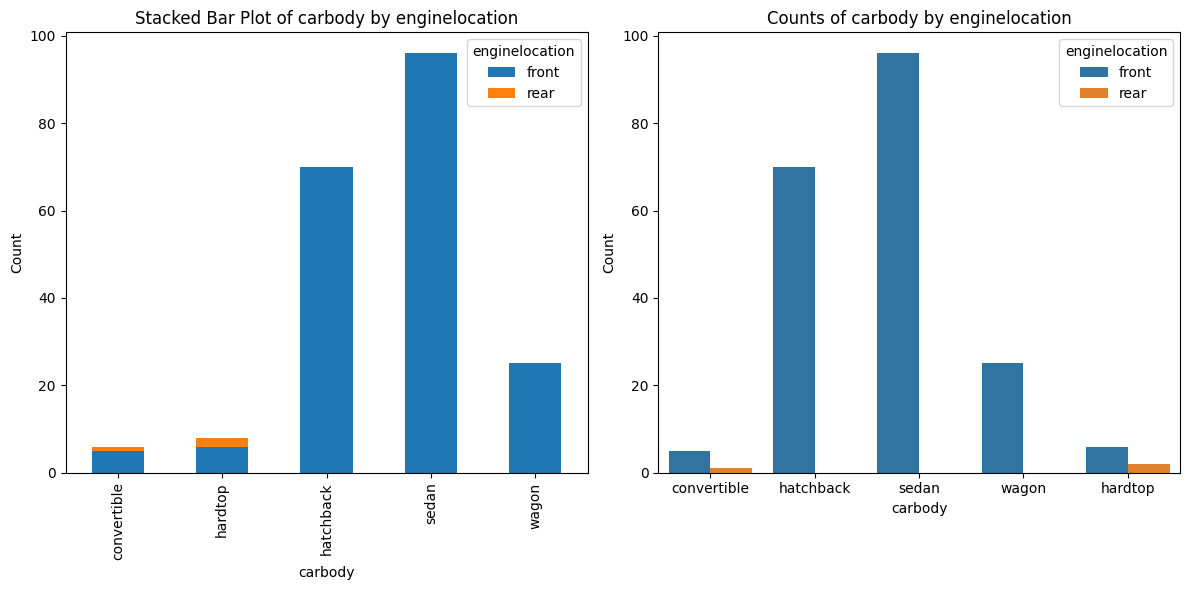

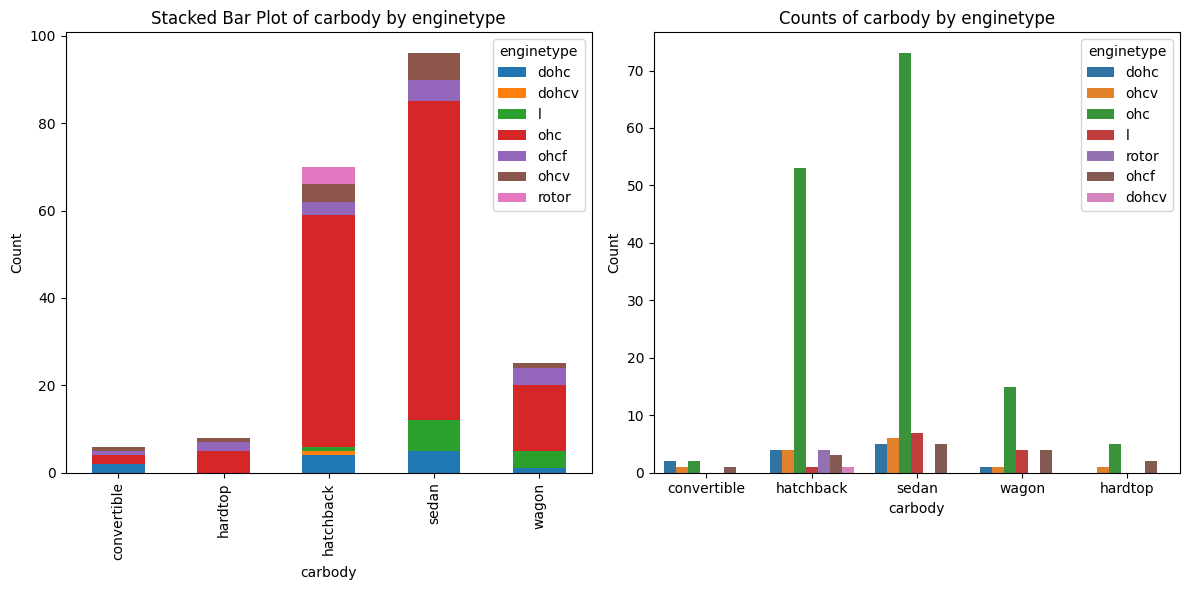

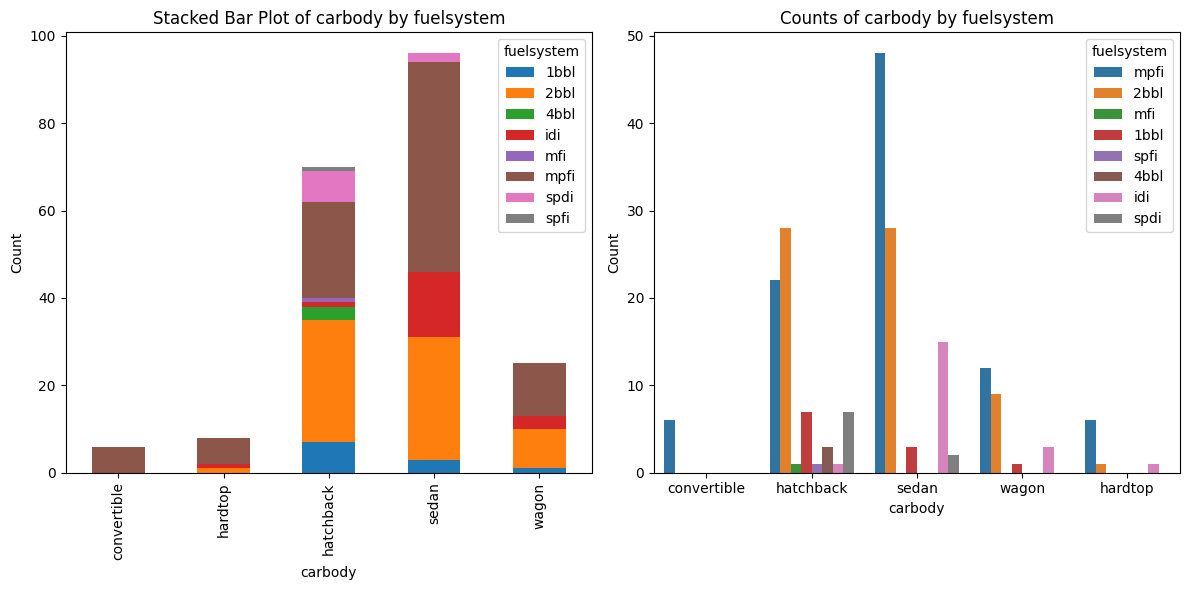

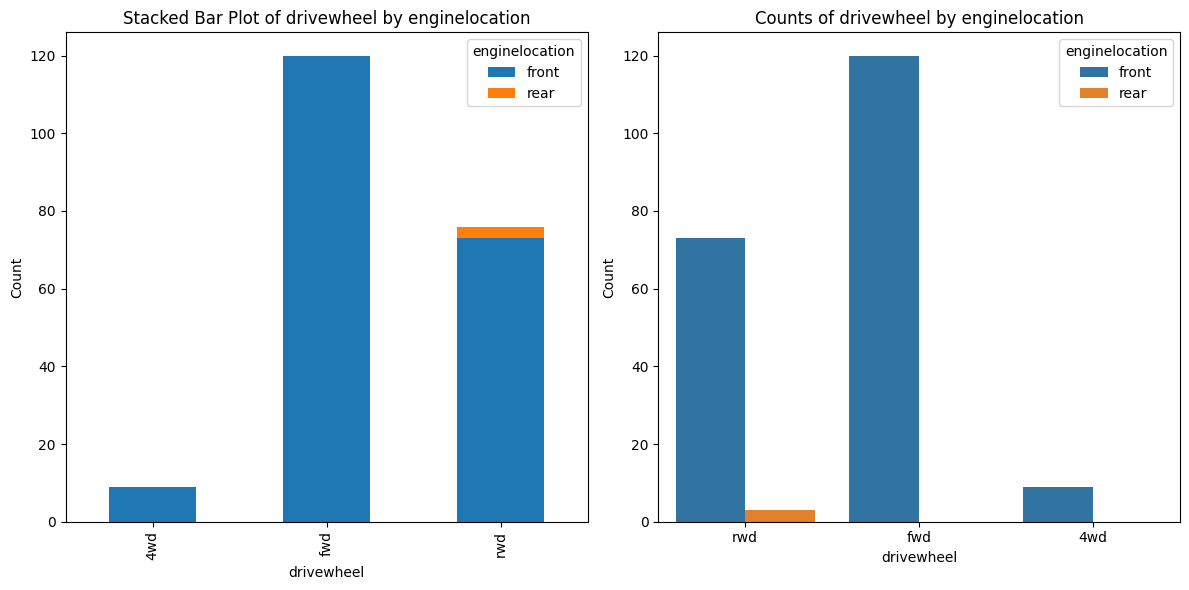

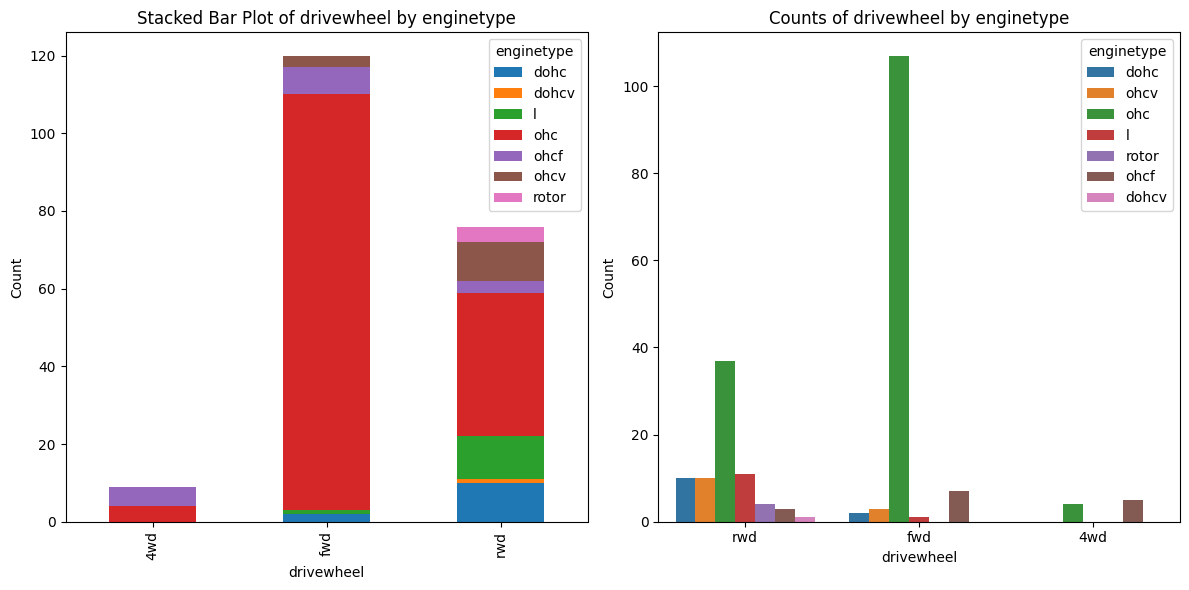

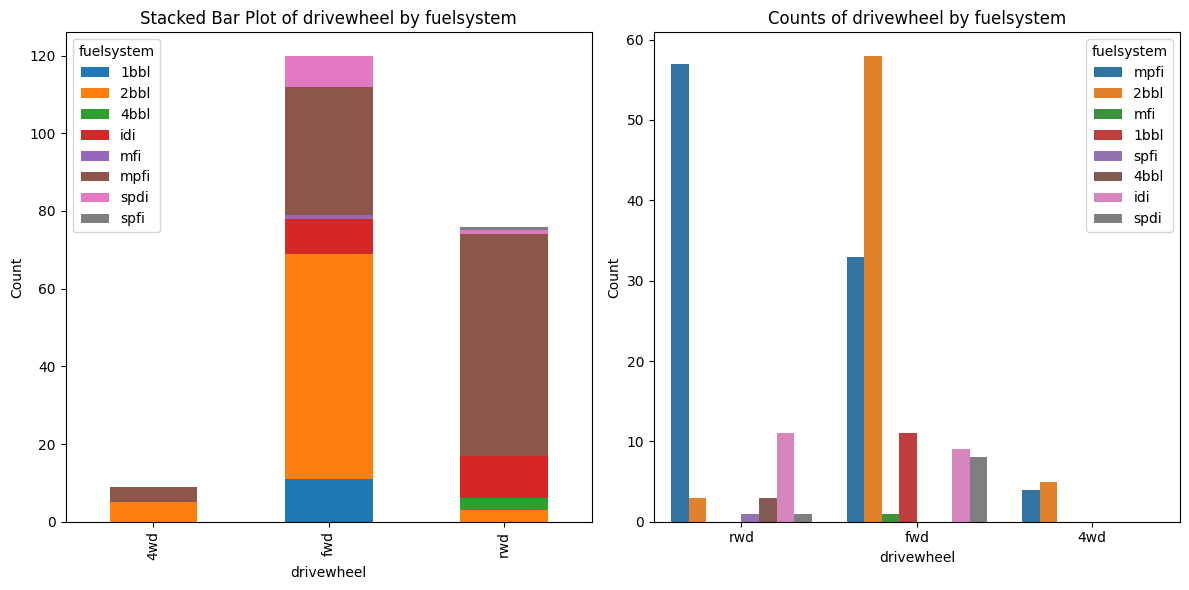

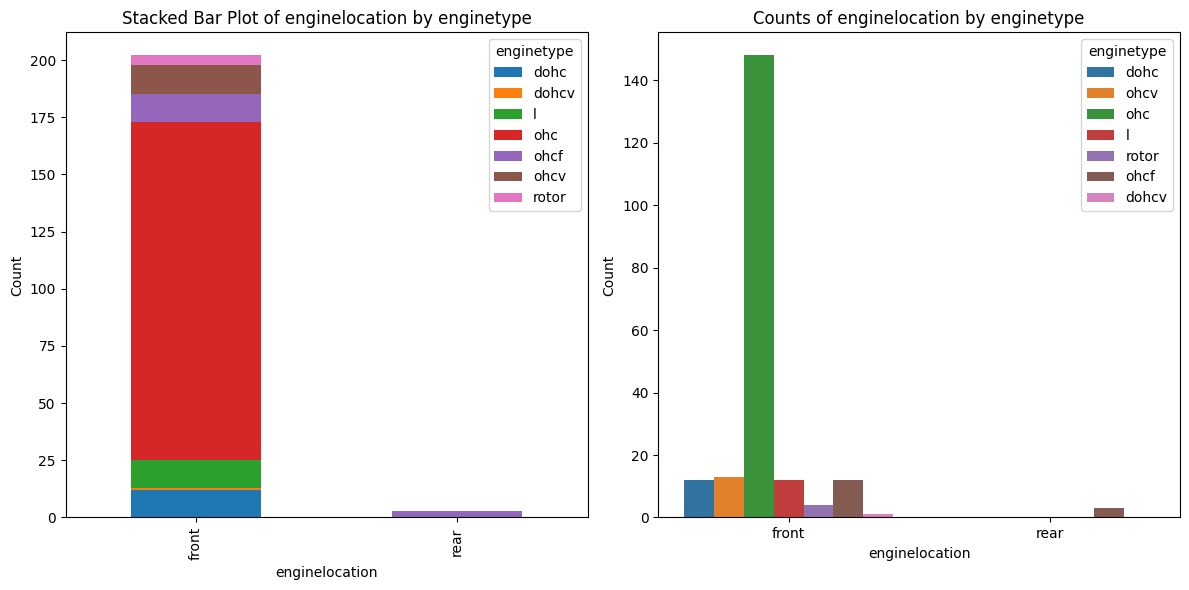

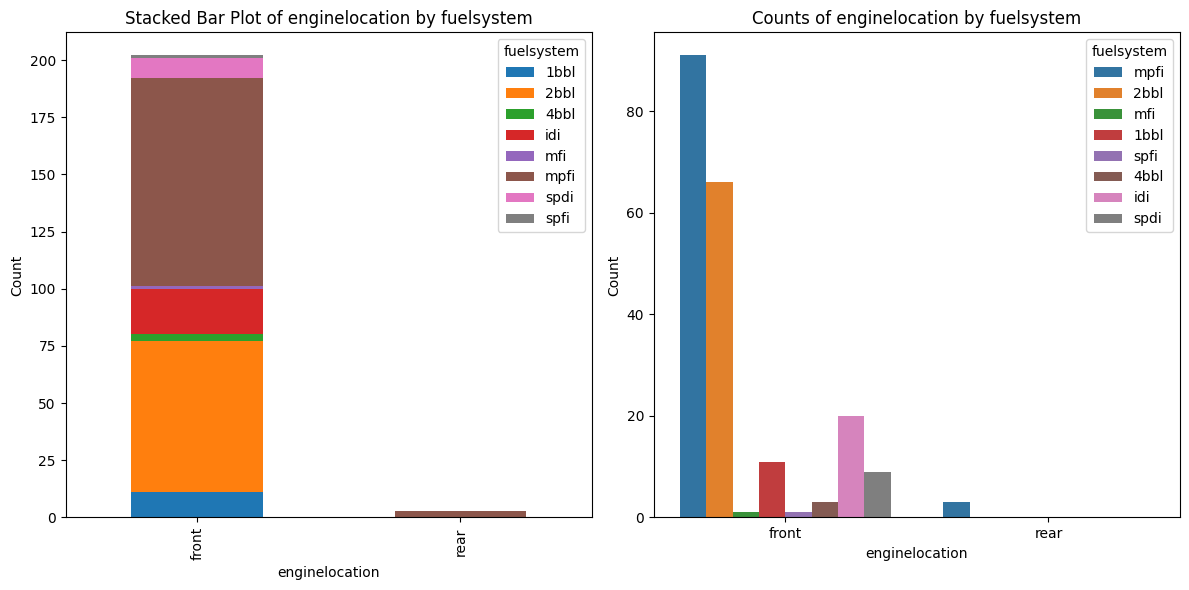

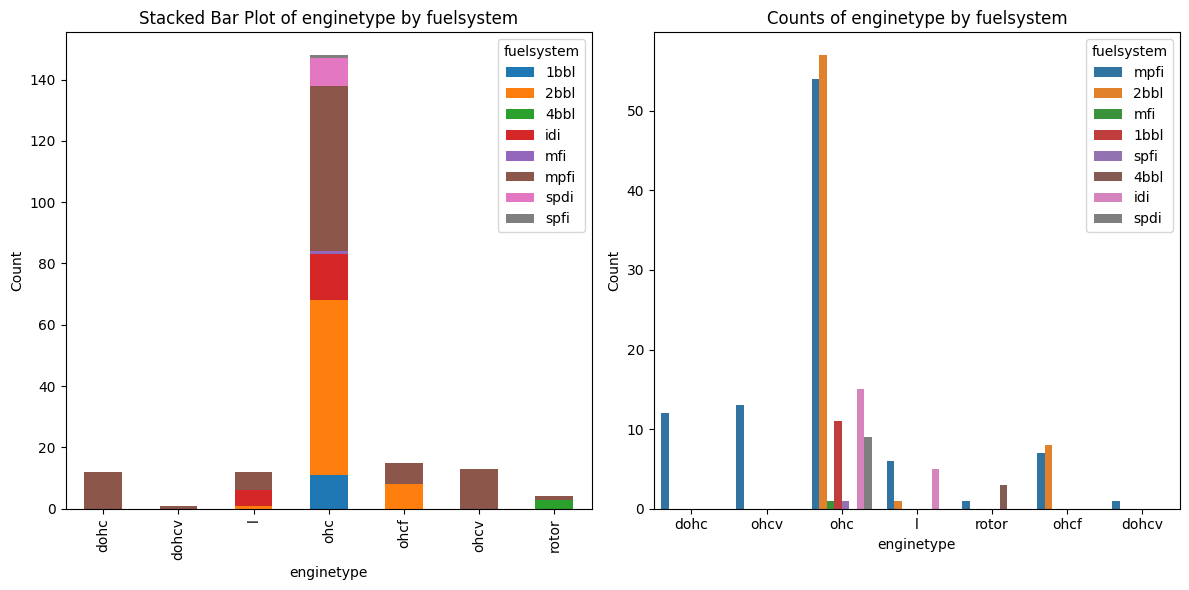

In [30]:
car_columns=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

# Tabulation and Stacked Bar Plot
for i in range(len(car_columns)):
    for j in range(i + 1, len(car_columns)):
        # Tabulation
        tab = pd.crosstab(df[car_columns[i]], df[car_columns[j]])

        # Create subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

        # Stacked Bar Plot
        tab.plot(kind='bar', stacked=True, ax=axes[0])
        axes[0].set_xlabel(car_columns[i])
        axes[0].set_ylabel('Count')
        axes[0].set_title(f'Stacked Bar Plot of {car_columns[i]} by {car_columns[j]}')

        # Grouped Bar Plot
        sns.countplot(data=df, x=car_columns[i], hue=car_columns[j], ax=axes[1])
        axes[1].set_xlabel(car_columns[i])
        axes[1].set_ylabel('Count')
        axes[1].set_title(f'Counts of {car_columns[i]} by {car_columns[j]}')

        plt.tight_layout()
        plt.show()

In [31]:
from scipy import stats

# Your DataFrame and cat_columns

cat_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Create an empty dictionary to store chi-square test results
chi_square_results = {}

# Tabulation and Chi-Square Test
for i in range(len(cat_columns)):
    for j in range(i + 1, len(cat_columns)):
        # Tabulation
        tab = pd.crosstab(df[cat_columns[i]], df[cat_columns[j]])
        
        # Perform chi-square test of independence
        chi2, p_value, dof, expected = stats.chi2_contingency(tab)
        
        # Store the results in the dictionary
        chi_square_results[(cat_columns[i], cat_columns[j])] = {'Chi-Square': chi2, 'P-Value': p_value}

# Print Chi-Square Test results
for pair, result in chi_square_results.items():
    print(f"Chi-Square Test of Independence for {pair}:")
    print(f"Chi-Square Statistic: {result['Chi-Square']}")
    print(f"P-Value: {result['P-Value']}")
    print("--------------------------------------------------")

Chi-Square Test of Independence for ('fueltype', 'aspiration'):
Chi-Square Statistic: 29.605759385109046
P-Value: 5.2947382636786724e-08
--------------------------------------------------
Chi-Square Test of Independence for ('fueltype', 'carbody'):
Chi-Square Statistic: 10.129344835907338
P-Value: 0.038304347063053835
--------------------------------------------------
Chi-Square Test of Independence for ('fueltype', 'drivewheel'):
Chi-Square Statistic: 3.5878645092460872
P-Value: 0.16630492889908455
--------------------------------------------------
Chi-Square Test of Independence for ('fueltype', 'enginelocation'):
Chi-Square Statistic: 0.0
P-Value: 1.0
--------------------------------------------------
Chi-Square Test of Independence for ('fueltype', 'enginetype'):
Chi-Square Statistic: 18.76795714633553
P-Value: 0.004574004556642926
--------------------------------------------------
Chi-Square Test of Independence for ('fueltype', 'fuelsystem'):
Chi-Square Statistic: 205.0
P-Value: 

In [32]:
# List of columns to drop
columns_to_drop = ["car_ID", "symboling", "doornumber", "stroke", "compressionratio"]

# Drop the specified columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)

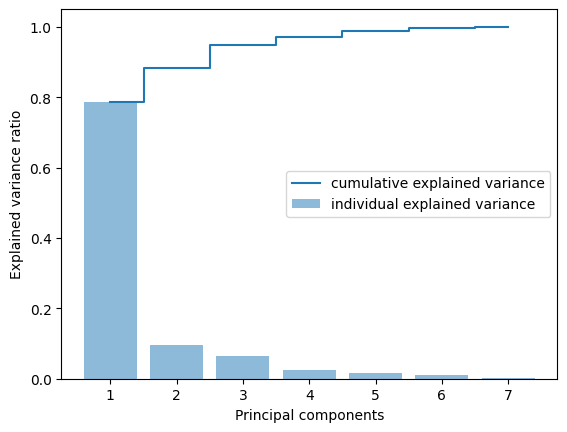

CarName fueltype aspiration      carbody drivewheel  \
0        alfa-romero giulia      gas        std  convertible        rwd   
1       alfa-romero stelvio      gas        std  convertible        rwd   
2  alfa-romero Quadrifoglio      gas        std    hatchback        rwd   
3               audi 100 ls      gas        std        sedan        fwd   
4                audi 100ls      gas        std        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  horsepower  \
0       dohc               4         130       mpfi       3.47         111   
1       dohc               4         130       mpfi       3.47         111   
2       ohcv               6         152       mpfi       2.68         154   
3        ohc               4         109       mpfi       3.19         102   
4        ohc               5         136       mpfi       3.19         115   

   peakrpm  citympg  highwaympg     price  CompanyName       PC1       PC2  \
0     5000       21          27  9.510075  alfa-romero  0.070353  1.152224   
1     5000       21          27  9.711116  alfa-romero  0.070353  1.152224   
2     5000       19          26  9.711116  alfa-romero  1.366912  1.228706   
3     5500       24          30  9.543235         audi -0.111224  0.081508   
4     5500       18          22  9.767095         audi  1.462274  0.760035   

        PC3       PC4       PC5       PC6  
0  0.128648  0.509339  0.121734  0.132106  
1  0.128648  0.509339  0.121734  0.132106  
2 -0.478876  0.074229 -0.147976  0.233765  
3  0.495482 -0.279571 -0.166481 -0.319627  
4  0.665499  0.123198  0.375451  0.126580

In [33]:
# Columns to perform PCA on
columns_for_pca = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
data_for_pca = df[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs in descending order
eig_pairs.sort(reverse=True)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sorted = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

# Calculate explained variance ratios and cumulative explained variance
var_explained = eigvalues_sorted / np.sum(eigvalues_sorted)
cum_var_explained = np.cumsum(var_explained)

# Plot explained variance ratios
plt.bar(range(1, len(var_explained) + 1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_explained) + 1), cum_var_explained, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Select the number of principal components to keep based on explained variance
num_components = 6

# Reduce dimensionality using selected number of components
P_reduce = eigvectors_sorted[:num_components]
X_std_reduced = np.dot(scaled_data, P_reduce.T)

# Convert the reduced data to a DataFrame
pca_columns = [f"PC{i + 1}" for i in range(num_components)]
pca_df = pd.DataFrame(data=X_std_reduced, columns=pca_columns)

# Concatenate PCA results with the original DataFrame
final_df = pd.concat([df, pca_df], axis=1)

# Print the final DataFrame with PCA components
final_df.head()

In [34]:
encoding_df=final_df.copy()

In [35]:
encoding_df.head()

CarName fueltype aspiration      carbody drivewheel  \
0        alfa-romero giulia      gas        std  convertible        rwd   
1       alfa-romero stelvio      gas        std  convertible        rwd   
2  alfa-romero Quadrifoglio      gas        std    hatchback        rwd   
3               audi 100 ls      gas        std        sedan        fwd   
4                audi 100ls      gas        std        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  horsepower  \
0       dohc               4         130       mpfi       3.47         111   
1       dohc               4         130       mpfi       3.47         111   
2       ohcv               6         152       mpfi       2.68         154   
3        ohc               4         109       mpfi       3.19         102   
4        ohc               5         136       mpfi       3.19         115   

   peakrpm  citympg  highwaympg     price  CompanyName       PC1       PC2  \
0     5000       21          27  9.510075  alfa-romero  0.070353  1.152224   
1     5000       21          27  9.711116  alfa-romero  0.070353  1.152224   
2     5000       19          26  9.711116  alfa-romero  1.366912  1.228706   
3     5500       24          30  9.543235         audi -0.111224  0.081508   
4     5500       18          22  9.767095         audi  1.462274  0.760035   

        PC3       PC4       PC5       PC6  
0  0.128648  0.509339  0.121734  0.132106  
1  0.128648  0.509339  0.121734  0.132106  
2 -0.478876  0.074229 -0.147976  0.233765  
3  0.495482 -0.279571 -0.166481 -0.319627  
4  0.665499  0.123198  0.375451  0.126580

In [36]:
encoding= pd.get_dummies(data=encoding_df, columns=['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem','CompanyName','enginetype'],drop_first=True)

encoding.head(2)

wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  \
0       88.6      168.8      64.1       48.8        2548               4   
1       88.6      168.8      64.1       48.8        2548               4   

   enginesize  boreratio  horsepower  peakrpm  citympg  highwaympg     price  \
0         130       3.47         111     5000       21          27  9.510075   
1         130       3.47         111     5000       21          27  9.711116   

        PC1       PC2       PC3       PC4       PC5       PC6  \
0  0.070353  1.152224  0.128648  0.509339  0.121734  0.132106   
1  0.070353  1.152224  0.128648  0.509339  0.121734  0.132106   

   CarName_alfa-romero Quadrifoglio  CarName_alfa-romero giulia  \
0                             False                        True   
1                             False                       False   

   CarName_alfa-romero stelvio  CarName_audi 100 ls  CarName_audi 100ls  \
0                        False                False               False   
1                         True                False               False   

   CarName_audi 4000  CarName_audi 5000  CarName_audi 5000s (diesel)  \
0              False              False                        False   
1              False              False                        False   

   CarName_audi fox  CarName_bmw 320i  CarName_bmw x1  CarName_bmw x3  \
0             False             False           False           False   
1             False             False           False           False   

   CarName_bmw x4  CarName_bmw x5  CarName_bmw z4  CarName_buick century  \
0           False           False           False                  False   
1           False           False           False                  False   

   CarName_buick century luxus (sw)  CarName_buick century special  \
0                             False                          False   
1                             False                          False   

   CarName_buick electra 225 custom  CarName_buick opel isuzu deluxe  \
0                             False                            False   
1                             False                            False   

   CarName_buick regal sport coupe (turbo)  CarName_buick skyhawk  \
0                                    False                  False   
1                                    False                  False   

   CarName_buick skylark  CarName_chevrolet impala  \
0                  False                     False   
1                  False                     False   

   CarName_chevrolet monte carlo  CarName_chevrolet vega 2300  \
0                          False                        False   
1                          False                        False   

   CarName_dodge challenger se  CarName_dodge colt (sw)  \
0                        False                    False   
1                        False                    False   

   CarName_dodge colt hardtop  CarName_dodge coronet custom  \
0                       False                         False   
1                       False                         False   

   CarName_dodge coronet custom (sw)  CarName_dodge d200  \
0                              False               False   
1                              False               False   

   CarName_dodge dart custom  CarName_dodge monaco (sw)  \
0                      False                      False   
1                      False                      False   

   CarName_dodge rampage  CarName_honda accord  CarName_honda accord cvcc  \
0                  False                 False                      False   
1                  False                 False                      False   

   CarName_honda accord lx  CarName_honda civic  CarName_honda civic (auto)  \
0                    False                False                       False   
1                    False                False                       False   

   CarName_honda civic 1300  CarName_honda civic 15

In [37]:
# Separate the target variable 'price' from the input features 'X'
y = encoding['price']
X = encoding.drop('price', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Now training and test sets ready for building the machine learning model

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 207)
(41, 207)
(164,)
(41,)


In [39]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  \
160       95.7      166.3      64.4       53.0        2094               4   
98        95.1      162.4      63.8       53.3        2008               4   
127       89.5      168.9      65.0       51.6        2756               6   
47       113.0      199.6      69.6       52.8        4066               6   
91        94.5      165.3      63.8       54.5        1918               4   
83        95.9      173.2      66.3       50.2        2921               4   
110      114.2      198.9      68.4       58.7        3430               4   
144       97.0      172.0      65.4       54.3        2385               4   
124       95.9      173.2      66.3       50.2        2818               4   
166       94.5      168.7      64.0       52.6        2300               4   
195      104.3      188.8      67.2       57.5        3034               4   
7        105.8      192.7      71.4       55.7        2954      

In [40]:
lr  = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()


In [41]:
regression_models = [lr,rfr,gbr,dtr,abr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))


In [42]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores


0                        1                            2  \
0  Linear Regression  Random Forest Regressor  Gradient Boosting Regressor   
1           0.994791                 0.987691                     0.992337   
2           0.756624                 0.899006                     0.882939   

                         3                  4  
0  Decision Tree Regressor  AdaBoostRegressor  
1                      1.0           0.961081  
2                 0.886971           0.863908

In [43]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

Model Training Set Accuracy Testing set Accuracy
0            Linear Regression              0.994791             0.756624
1      Random Forest Regressor              0.987691             0.899006
2  Gradient Boosting Regressor              0.992337             0.882939
3      Decision Tree Regressor                   1.0             0.886971
4            AdaBoostRegressor              0.961081             0.863908

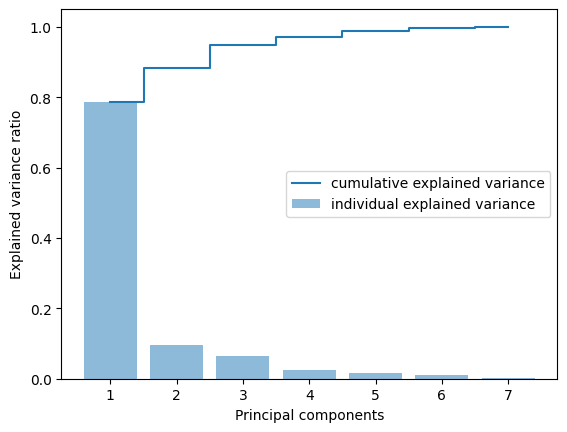

CarName fueltype aspiration      carbody drivewheel  \
0        alfa-romero giulia      gas        std  convertible        rwd   
1       alfa-romero stelvio      gas        std  convertible        rwd   
2  alfa-romero Quadrifoglio      gas        std    hatchback        rwd   
3               audi 100 ls      gas        std        sedan        fwd   
4                audi 100ls      gas        std        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  horsepower  \
0       dohc               4         130       mpfi       3.47         111   
1       dohc               4         130       mpfi       3.47         111   
2       ohcv               6         152       mpfi       2.68         154   
3        ohc               4         109       mpfi       3.19         102   
4        ohc               5         136       mpfi       3.19         115   

   peakrpm  citympg  highwaympg     price  CompanyName       PC1       PC2  \
0     5000       21          27  9.510075  alfa-romero  0.070353  1.152224   
1     5000       21          27  9.711116  alfa-romero  0.070353  1.152224   
2     5000       19          26  9.711116  alfa-romero  1.366912  1.228706   
3     5500       24          30  9.543235         audi -0.111224  0.081508   
4     5500       18          22  9.767095         audi  1.462274  0.760035   

        PC3       PC4       PC5       PC6  
0  0.128648  0.509339  0.121734  0.132106  
1  0.128648  0.509339  0.121734  0.132106  
2 -0.478876  0.074229 -0.147976  0.233765  
3  0.495482 -0.279571 -0.166481 -0.319627  
4  0.665499  0.123198  0.375451  0.126580

In [44]:

# Columns to perform PCA on
columns_for_pca = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
data_for_pca = df[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs in descending order
eig_pairs.sort(reverse=True)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sorted = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

# Calculate explained variance ratios and cumulative explained variance
var_explained = eigvalues_sorted / np.sum(eigvalues_sorted)
cum_var_explained = np.cumsum(var_explained)

# Plot explained variance ratios
plt.bar(range(1, len(var_explained) + 1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_explained) + 1), cum_var_explained, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Select the number of principal components to keep based on explained variance
num_components = 6

# Reduce dimensionality using selected number of components
P_reduce = eigvectors_sorted[:num_components]
X_std_reduced = np.dot(scaled_data, P_reduce.T)

# Convert the reduced data to a DataFrame
pca_columns = [f"PC{i + 1}" for i in range(num_components)]
pca_df = pd.DataFrame(data=X_std_reduced, columns=pca_columns)

# Concatenate PCA results with the original DataFrame
final_df = pd.concat([df, pca_df], axis=1)

# Print the final DataFrame with PCA components
final_df.head()

<Axes: >

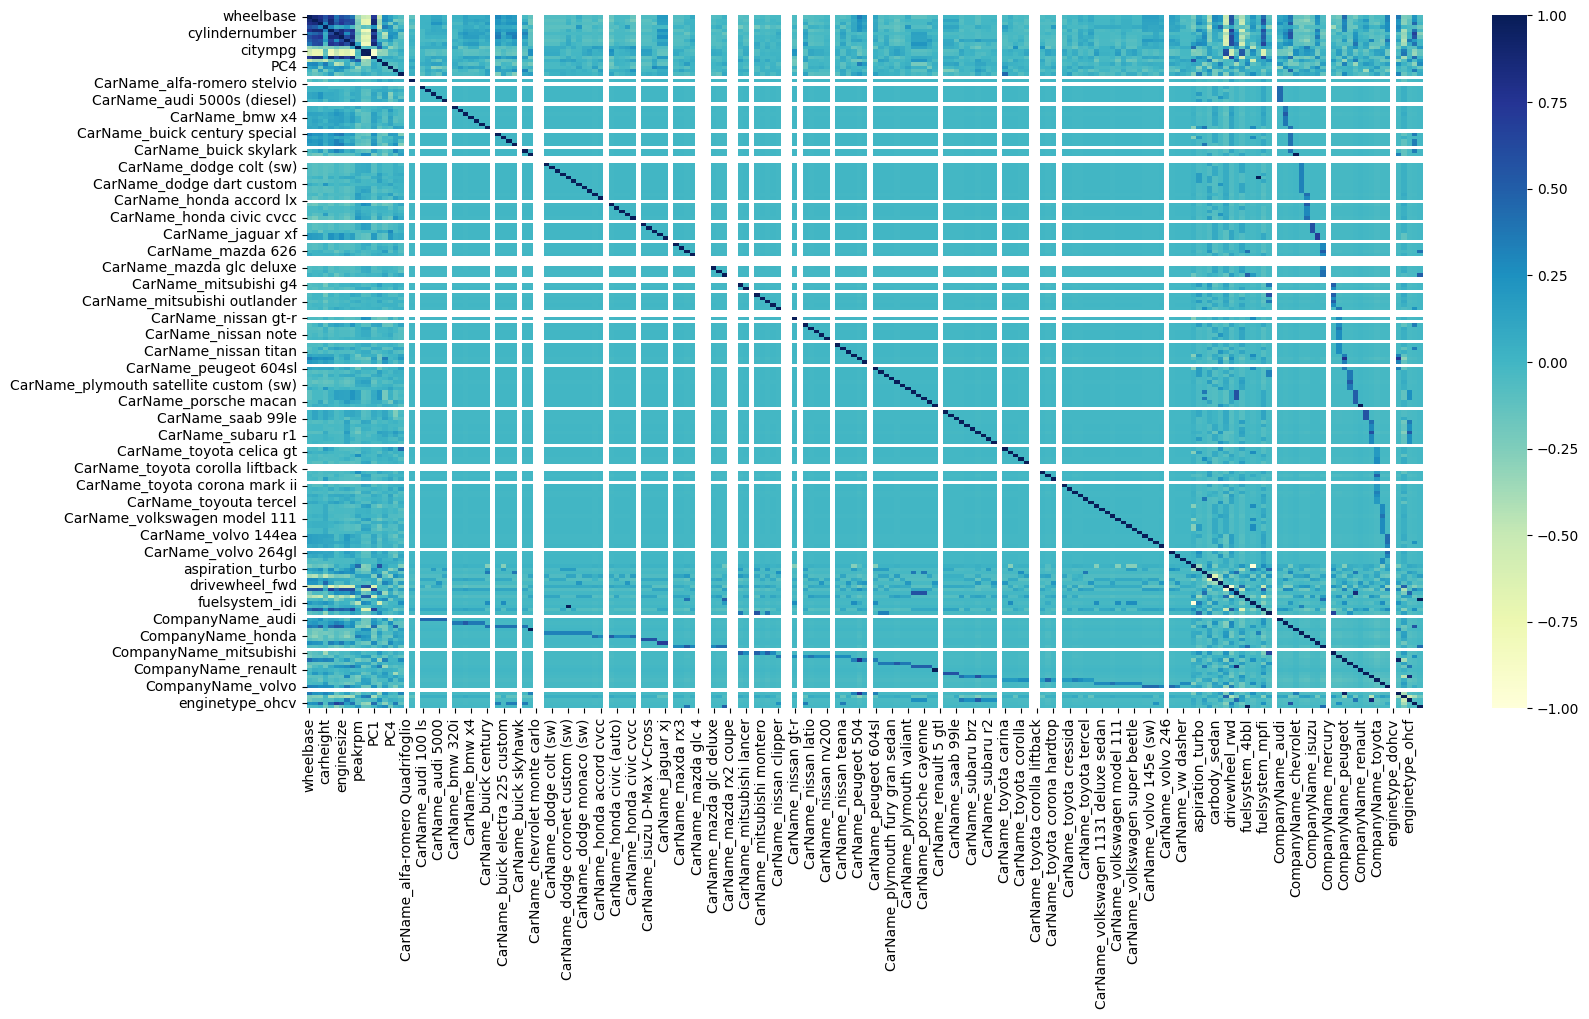

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [46]:
X_train.shape

(164, 207)

In [47]:
X_train.head()

wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  \
160       95.7      166.3      64.4       53.0        2094               4   
98        95.1      162.4      63.8       53.3        2008               4   
127       89.5      168.9      65.0       51.6        2756               6   
47       113.0      199.6      69.6       52.8        4066               6   
91        94.5      165.3      63.8       54.5        1918               4   

     enginesize  boreratio  horsepower  peakrpm  citympg  highwaympg  \
160          98       3.19          70     4800       38          47   
98           97       3.15          69     5200       31          37   
127         194       3.74         207     5900       17          25   
47          258       3.63         176     4750       15          19   
91           97       3.15          69     5200       31          37   

          PC1       PC2       PC3       PC4       PC5       PC6  \
160 -3.079352 -1.260677 -0.953861 -0.093343 -0.546209  0.016910   
98  -2.418782  0.089200 -0.111718  0.110050  0.088313 -0.096650   
127  2.198146  2.101926 -1.643978  0.157193 -0.449534 -0.135039   
47   5.671731 -0.601273 -0.959684  0.896967  0.263355  0.257387   
91  -2.402780  0.019361 -0.023035  0.149425 -0.041515 -0.323748   

     CarName_alfa-romero Quadrifoglio  CarName_alfa-romero giulia  \
160                             False                       False   
98                              False                       False   
127                             False                       False   
47                              False                       False   
91                              False                       False   

     CarName_alfa-romero stelvio  CarName_audi 100 ls  CarName_audi 100ls  \
160                        False                False               False   
98                         False                False               False   
127                        False                False               False   
47                         False                False               False   
91                         False                False               False   

     CarName_audi 4000  CarName_audi 5000  CarName_audi 5000s (diesel)  \
160              False              False                        False   
98               False              False                        False   
127              False              False                        False   
47               False              False                        False   
91               False              False                        False   

     CarName_audi fox  CarName_bmw 320i  CarName_bmw x1  CarName_bmw x3  \
160             False             False           False           False   
98              False             False           False           False   
127             False             False           False           False   
47              False             False           False           False   
91              False             False           False           False   

     CarName_bmw x4  CarName_bmw x5  CarName_bmw z4  CarName_buick century  \
160           False           False           False                  False   
98            False           False           False                  False   
127           False           False           False                  False   
47            False           False           False                  False   
91            False           False           False                  False   

     CarName_buick century luxus (sw)  CarName_buick century special  \
160                             False                          False   
98                              False                          False   
127                             False                          False   
47                              False                          False   
91                              False                          False   

     CarName_buick elect

In [48]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [49]:
pca.fit(X_train)

PCA(random_state=0)

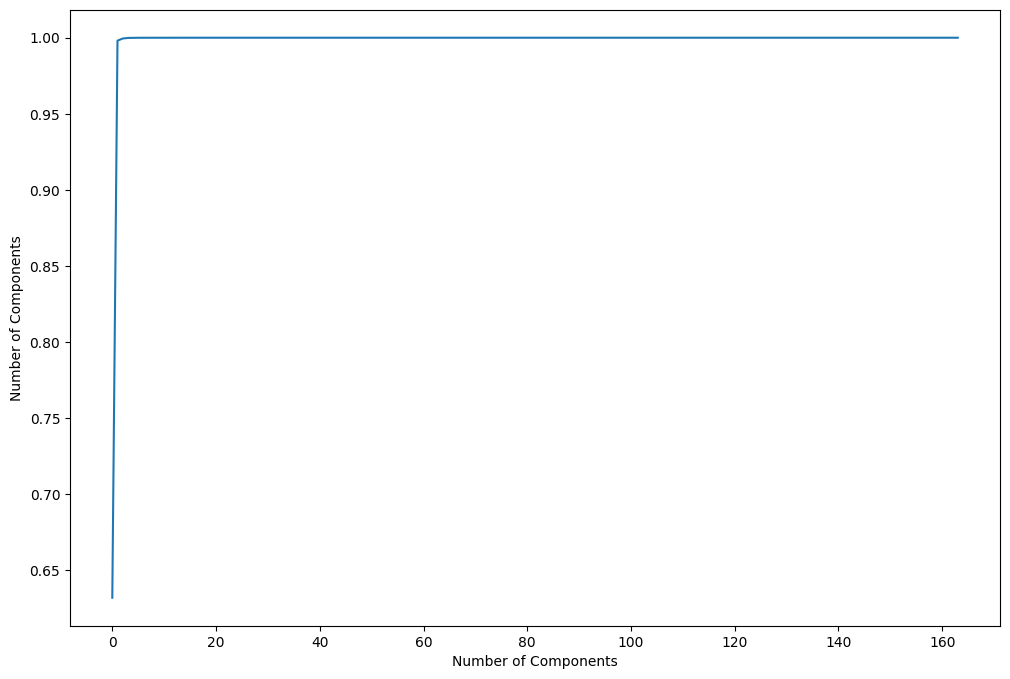

In [50]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.63202974, 0.9980632 , 0.9994798 , 0.9998521 , 0.99993202,
       0.99997123, 0.99998313, 0.99998918, 0.99999136, 0.99999326,
       0.99999395, 0.9999946 , 0.99999511, 0.9999956 , 0.99999595,
       0.99999623, 0.99999649, 0.99999672, 0.99999691, 0.99999709,
       0.99999726, 0.99999741, 0.99999755, 0.99999766, 0.99999777,
       0.99999787, 0.99999796, 0.99999804, 0.99999811, 0.99999818,
       0.99999824, 0.99999829, 0.99999834, 0.99999839, 0.99999843,
       0.99999847, 0.99999851, 0.99999855, 0.99999859, 0.99999862,
       0.99999865, 0.99999868, 0.99999871, 0.99999874, 0.99999877,
       0.99999879, 0.99999882, 0.99999885, 0.99999887, 0.9999989 ,
       0.99999892, 0.99999894, 0.99999897, 0.99999899, 0.99999901,
       0.99999904, 0.99999906, 0.99999908, 0.9999991 , 0.99999912,
       0.99999914, 0.99999916, 0.99999918, 0.9999992 , 0.99999921,
       0.99999923, 0.99999925, 0.99999926, 0.99999928, 0.99999929,
       0.99999931, 0.99999932, 0.99999934, 0.99999935, 0.99999

In [52]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [53]:
X_train_pca.shape

(164, 15)

In [54]:
corrmat = np.corrcoef(X_train_pca.T)

In [55]:
X_train_pca.shape

(164, 15)

In [56]:
corrmat = np.corrcoef(X_train_pca.T)

<Axes: >

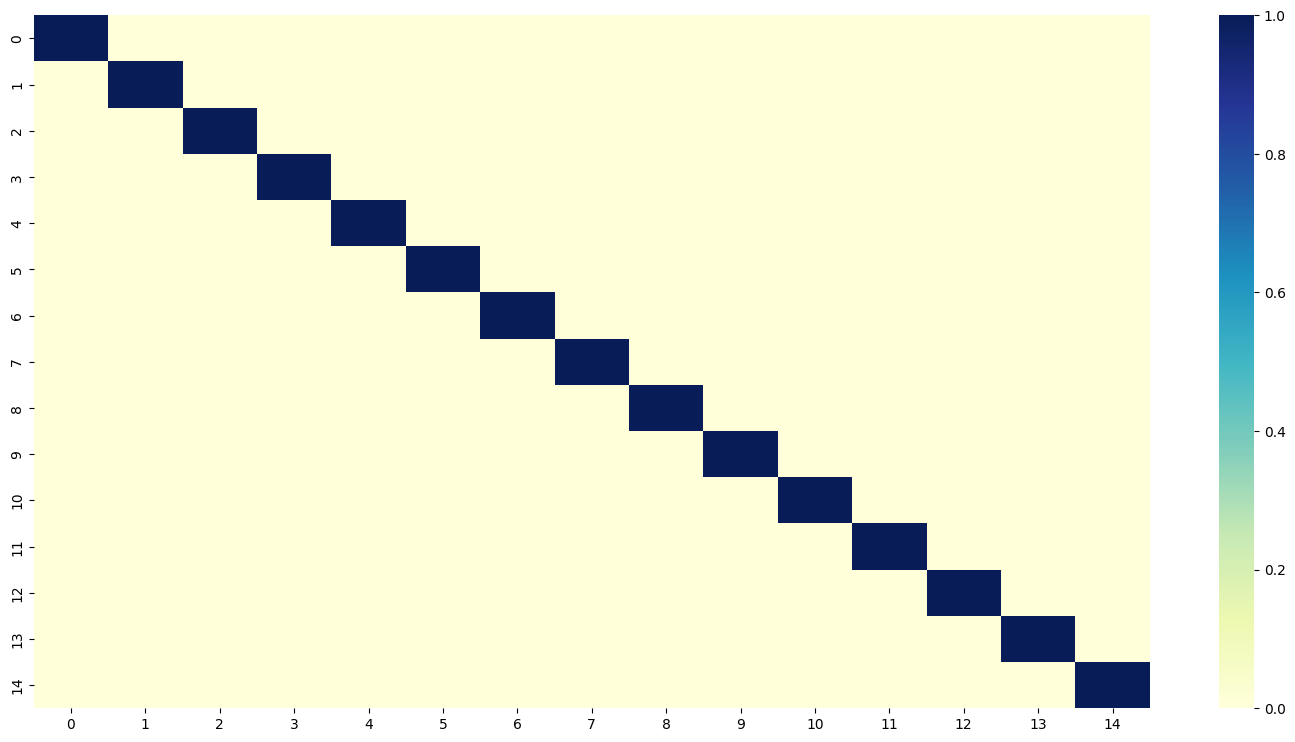

In [57]:
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [58]:
X_test.head()

wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  \
131       96.1      176.8      66.6       50.5        2460               4   
117      108.0      186.7      68.3       56.0        3130               4   
63        98.8      177.8      66.5       55.5        2443               4   
56        95.3      169.0      65.7       49.6        2380               2   
49       102.0      191.7      70.6       47.8        3950              12   

     enginesize  boreratio  horsepower  peakrpm  citympg  highwaympg  \
131         132       3.46          90     5100       23          31   
117         134       3.61         142     5600       18          24   
63          122       3.39          64     4650       36          42   
56           70       3.33         101     6000       17          23   
49          326       3.54         262     5000       13          17   

          PC1       PC2       PC3       PC4       PC5       PC6  \
131  0.156657 -0.216260  0.293421 -0.040542  0.245984 -0.389773   
117  2.452029  0.002375  0.558681 -0.423025 -0.310569  0.257390   
63  -1.544506 -1.992149 -0.528130 -0.014022 -0.170860 -0.099422   
56   0.049220  1.402729  1.631896 -0.587032  0.146345  0.180291   
49   7.152685  0.529680 -2.981053  0.296113  0.216380 -0.305856   

     CarName_alfa-romero Quadrifoglio  CarName_alfa-romero giulia  \
131                             False                       False   
117                             False                       False   
63                              False                       False   
56                              False                       False   
49                              False                       False   

     CarName_alfa-romero stelvio  CarName_audi 100 ls  CarName_audi 100ls  \
131                        False                False               False   
117                        False                False               False   
63                         False                False               False   
56                         False                False               False   
49                         False                False               False   

     CarName_audi 4000  CarName_audi 5000  CarName_audi 5000s (diesel)  \
131              False              False                        False   
117              False              False                        False   
63               False              False                        False   
56               False              False                        False   
49               False              False                        False   

     CarName_audi fox  CarName_bmw 320i  CarName_bmw x1  CarName_bmw x3  \
131             False             False           False           False   
117             False             False           False           False   
63              False             False           False           False   
56              False             False           False           False   
49              False             False           False           False   

     CarName_bmw x4  CarName_bmw x5  CarName_bmw z4  CarName_buick century  \
131           False           False           False                  False   
117           False           False           False                  False   
63            False           False           False                  False   
56            False           False           False                  False   
49            False           False           False                  False   

     CarName_buick century luxus (sw)  CarName_buick century special  \
131                             False                          False   
117                             False                          False   
63                              False                          False   
56                              False                          False   
49                              False                          False   

     CarName_buick elect